New scipt for doing all sort of warmstarting analysis within the forecase gen data

Forecasting analysis between S6 and ART

In [114]:
import os
import sys

root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

print(sys.path)

import numpy as np
import numpy.linalg as la
import numpy.matlib as matl
import matplotlib.pyplot as plt

from ff_scenario import n_obs, obs, robot_radius, safety_margin, goal_region, start_region, iter_max_SCP
rl = True
save_plots = False

traj_data = np.load(root_folder + '/optimization/saved_files/prediction_analysis_S6/pred_analysis_2_checkpoint_ff_GSA_vs_checkpoint_ff_S6_gsa_test3000.npz',allow_pickle=True)


['/home/arpit/miniforge3/envs/MAMBA/lib/python310.zip', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/lib-dynload', '', '/home/arpit/.local/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/mamba_ssm-2.2.4-py3.10-linux-x86_64.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools-75.6.0-py3.10.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools/_vendor', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/tran

In [115]:
# ==== Feasibility flags ====
feasibility_list_CVX = traj_data['feasibility_list_CVX']
feasibility_list_DT = traj_data['feasibility_list_DT']
feasibility_list_S6 = traj_data['feasibility_list_S6']

# ==== Costs ====
ctgs0_cvx = traj_data['ctgs0_cvx']
J_list_CVX = traj_data['J_list_CVX']
J_list_DT = traj_data['J_list_DT']
J_list_S6 = traj_data['J_list_S6']

# ==== J vectors ====
J_vect_scp_list_CVX = traj_data['J_vect_scp_list_CVX']
J_vect_scp_list_DT = traj_data['J_vect_scp_list_DT']
J_vect_scp_list_S6 = traj_data['J_vect_scp_list_S6']

# ==== Warmstart runtime metrics ====
runtime_list_CVX = traj_data['runtime_list_CVX']
runtime_list_DT = traj_data['runtime_list_DT']
runtime_list_S6 = traj_data['runtime_list_S6']

# ==== SCP runtime metrics ====
runtime_scp_list_CVX = traj_data['runtime_scp_list_CVX']
runtime_scp_list_DT = traj_data['runtime_scp_list_DT']
runtime_scp_list_S6 = traj_data['runtime_scp_list_S6']

# ==== SCP Iterations ====
iter_scp_list_CVX = traj_data['iter_scp_list_CVX']
iter_scp_list_DT = traj_data['iter_scp_list_DT']
iter_scp_list_S6 = traj_data['iter_scp_list_S6']

# ==== Errors ====
trajectory_rmse_list_DT = traj_data['trajectory_rmse_list_DT']
trajectory_rmse_list_S6 = traj_data['trajectory_rmse_list_S6']
control_error_list_DT = traj_data['control_error_list_DT']
control_error_list_S6 = traj_data['control_error_list_S6']
final_state_error_list_DT = traj_data['final_state_error_list_DT']
final_state_error_list_S6 = traj_data['final_state_error_list_S6']

FORECASTING ANALYSIS WITH TEST DATASET

In [116]:
num_true = np.sum(feasibility_list_DT)  # Counts True values (True is 1, False is 0)
num_false = len(feasibility_list_DT) - num_true  # Remaining are False
num_true_S6 = np.sum(feasibility_list_S6)  # Counts True values (True is 1, False is 0)
num_false_S6 = len(feasibility_list_S6) - num_true_S6   # Remaining are False
print(f"#Feasible ART: {num_true}, #Not-Feasible ART: {num_false}")
print(f"#Feasible S6: {num_true_S6}, #Not-Feasible S6: {num_false_S6}")

#Feasible ART: 2991, #Not-Feasible ART: 14118
#Feasible S6: 2618, #Not-Feasible S6: 14491


In [117]:
combined_feasibility_mask = feasibility_list_DT & feasibility_list_S6 & feasibility_list_CVX
print(f"Feasible in all models: {np.sum(combined_feasibility_mask)}")

Feasible in all models: 2614


In [118]:
# # === Masking for DT ===
# filtered_trajectory_rmse_DT = trajectory_rmse_list_DT[feasibility_list_DT]
# filtered_control_error_DT = control_error_list_DT[feasibility_list_DT]
# filtered_final_state_error_DT = final_state_error_list_DT[feasibility_list_DT]
# filtered_runtime_DT = runtime_list_DT[feasibility_list_DT]
# filtered_runtime_scp_DT = runtime_scp_list_DT[feasibility_list_DT]
# filtered_iter_scp_DT = iter_scp_list_DT[feasibility_list_DT]
# filtered_J_list_DT = J_list_DT[feasibility_list_DT]
# filtered_J_vect_scp_list_DT = J_vect_scp_list_DT[feasibility_list_DT]

# # === Masking for S6 ===
# filtered_trajectory_rmse_S6 = trajectory_rmse_list_S6[feasibility_list_S6]
# filtered_control_error_S6 = control_error_list_S6[feasibility_list_S6]
# filtered_final_state_error_S6 = final_state_error_list_S6[feasibility_list_S6]
# filtered_runtime_S6 = runtime_list_S6[feasibility_list_S6]
# filtered_runtime_scp_S6 = runtime_scp_list_S6[feasibility_list_S6]
# filtered_iter_scp_S6 = iter_scp_list_S6[feasibility_list_S6]
# filtered_J_list_S6 = J_list_S6[feasibility_list_S6]
# filtered_J_vect_scp_list_S6 = J_vect_scp_list_S6[feasibility_list_S6]

# # === Masking for CVX ===
# filtered_runtime_CVX = runtime_list_CVX[feasibility_list_CVX]
# filtered_runtime_scp_CVX = runtime_scp_list_CVX[feasibility_list_CVX]
# filtered_iter_scp_CVX = iter_scp_list_CVX[feasibility_list_CVX]
# filtered_ctgs0_cvx = ctgs0_cvx[feasibility_list_CVX]
# filtered_J_list_CVX = J_list_CVX[feasibility_list_CVX]
# filtered_J_vect_scp_list_CVX = J_vect_scp_list_CVX[feasibility_list_CVX]


# print(f" # Feasible Trajectories for ART: {len(filtered_trajectory_rmse_DT)}")
# print(f" # Feasible Trajectories for S6: {len(filtered_trajectory_rmse_S6)}")
# print(f" # Feasible Trajectories for CVX: {len(filtered_runtime_scp_CVX)}")

In [119]:
# === Masking for DT ===
filtered_trajectory_rmse_DT = trajectory_rmse_list_DT[combined_feasibility_mask]
filtered_control_error_DT = control_error_list_DT[combined_feasibility_mask]
filtered_final_state_error_DT = final_state_error_list_DT[combined_feasibility_mask]
filtered_runtime_DT = runtime_list_DT[combined_feasibility_mask]
filtered_runtime_scp_DT = runtime_scp_list_DT[combined_feasibility_mask]
filtered_iter_scp_DT = iter_scp_list_DT[combined_feasibility_mask]
filtered_J_list_DT = J_list_DT[combined_feasibility_mask]
filtered_J_vect_scp_list_DT = J_vect_scp_list_DT[combined_feasibility_mask]

# === Masking for S6 ===
filtered_trajectory_rmse_S6 = trajectory_rmse_list_S6[combined_feasibility_mask]
filtered_control_error_S6 = control_error_list_S6[combined_feasibility_mask]
filtered_final_state_error_S6 = final_state_error_list_S6[combined_feasibility_mask]
filtered_runtime_S6 = runtime_list_S6[combined_feasibility_mask]
filtered_runtime_scp_S6 = runtime_scp_list_S6[combined_feasibility_mask]
filtered_iter_scp_S6 = iter_scp_list_S6[combined_feasibility_mask]
filtered_J_list_S6 = J_list_S6[combined_feasibility_mask]
filtered_J_vect_scp_list_S6 = J_vect_scp_list_S6[combined_feasibility_mask]

# === Masking for CVX ===
filtered_runtime_CVX = runtime_list_CVX[combined_feasibility_mask]
filtered_runtime_scp_CVX = runtime_scp_list_CVX[combined_feasibility_mask]
filtered_iter_scp_CVX = iter_scp_list_CVX[combined_feasibility_mask]
filtered_ctgs0_cvx = ctgs0_cvx[combined_feasibility_mask]
filtered_J_list_CVX = J_list_CVX[combined_feasibility_mask]
filtered_J_vect_scp_list_CVX = J_vect_scp_list_CVX[combined_feasibility_mask]


print(f" # Feasible Trajectories for ART: {len(filtered_trajectory_rmse_DT)}")
print(f" # Feasible Trajectories for S6: {len(filtered_trajectory_rmse_S6)}")
print(f" # Feasible Trajectories for CVX: {len(filtered_runtime_scp_CVX)}")

 # Feasible Trajectories for ART: 2614
 # Feasible Trajectories for S6: 2614
 # Feasible Trajectories for CVX: 2614


In [120]:
# ART forecasting analysis

# === DT Metrics ===
mean_trajectory_rmse_DT = np.mean(filtered_trajectory_rmse_DT)
std_trajectory_rmse_DT = np.std(filtered_trajectory_rmse_DT)

mean_control_error_DT = np.mean(filtered_control_error_DT)
std_control_error_DT = np.std(filtered_control_error_DT)

mean_final_state_error_DT = np.mean(filtered_final_state_error_DT)
std_final_state_error_DT = np.std(filtered_final_state_error_DT)

mean_runtime_DT = np.mean(filtered_runtime_DT)
std_runtime_DT = np.std(filtered_runtime_DT)

mean_runtime_scp_DT = np.mean(filtered_runtime_scp_DT)
std_runtime_scp_DT = np.std(filtered_runtime_scp_DT)

mean_iter_scp_DT = np.mean(filtered_iter_scp_DT)
std_iter_scp_DT = np.std(filtered_iter_scp_DT)

mean_J_list_DT = np.mean(filtered_J_list_DT)
std_J_list_DT = np.std(filtered_J_list_DT)

min_J_vect_scp_DT = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_DT])
mean_convergence_cost_DT = np.mean(min_J_vect_scp_DT)
std_convergence_cost_DT = np.std(min_J_vect_scp_DT)

# === S6 Metrics ===
mean_trajectory_rmse_S6 = np.mean(filtered_trajectory_rmse_S6)
std_trajectory_rmse_S6 = np.std(filtered_trajectory_rmse_S6)

mean_control_error_S6 = np.mean(filtered_control_error_S6)
std_control_error_S6 = np.std(filtered_control_error_S6)

mean_final_state_error_S6 = np.mean(filtered_final_state_error_S6)
std_final_state_error_S6 = np.std(filtered_final_state_error_S6)

mean_runtime_S6 = np.mean(filtered_runtime_S6)
std_runtime_S6 = np.std(filtered_runtime_S6)

mean_runtime_scp_S6 = np.mean(filtered_runtime_scp_S6)
std_runtime_scp_S6 = np.std(filtered_runtime_scp_S6)

mean_iter_scp_S6 = np.mean(filtered_iter_scp_S6)
std_iter_scp_S6 = np.std(filtered_iter_scp_S6)

mean_J_list_S6 = np.mean(filtered_J_list_S6)
std_J_list_S6 = np.std(filtered_J_list_S6)

min_J_vect_scp_S6 = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_S6])
mean_convergence_cost_S6 = np.mean(min_J_vect_scp_S6)
std_convergence_cost_S6 = np.std(min_J_vect_scp_S6)

# === CVX Metrics ===
mean_runtime_CVX = np.mean(filtered_runtime_CVX)
std_runtime_CVX = np.std(filtered_runtime_CVX)

mean_runtime_scp_CVX = np.mean(filtered_runtime_scp_CVX)
std_runtime_scp_CVX = np.std(filtered_runtime_scp_CVX)

mean_iter_scp_CVX = np.mean(filtered_iter_scp_CVX)
std_iter_scp_CVX = np.std(filtered_iter_scp_CVX)

mean_J_list_CVX = np.mean(filtered_J_list_CVX)
std_J_list_CVX = np.std(filtered_J_list_CVX)

min_J_vect_scp_CVX = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_CVX])
mean_convergence_cost_CVX = np.mean(min_J_vect_scp_CVX)
std_convergence_cost_CVX = np.std(min_J_vect_scp_CVX)


# === Print Results ===
print("Decision Transformer (DT) Mean ± Std:")
print(f"Trajectory RMSE: {mean_trajectory_rmse_DT:.4f} ± {std_trajectory_rmse_DT:.4f}")
print(f"Control Error: {mean_control_error_DT:.4f} ± {std_control_error_DT:.4f}")
print(f"Final State Error: {mean_final_state_error_DT:.4f} ± {std_final_state_error_DT:.4f}")
print(f"Runtime: {mean_runtime_DT:.4f} ± {std_runtime_DT:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_DT:.4f} ± {std_runtime_scp_DT:.4f}")
print(f"Iterations SCP: {mean_iter_scp_DT:.2f} ± {std_iter_scp_DT:.2f}")
print(f"Converged Cost WS: {mean_J_list_DT:.4f} ± {std_J_list_DT:.4f}")
print(f"Converged Cost: {mean_convergence_cost_DT:.4f} ± {std_convergence_cost_DT:.4f}")

print("\nS6 Model Mean ± Std:")
print(f"Trajectory RMSE: {mean_trajectory_rmse_S6:.4f} ± {std_trajectory_rmse_S6:.4f}")
print(f"Control Error: {mean_control_error_S6:.4f} ± {std_control_error_S6:.4f}")
print(f"Final State Error: {mean_final_state_error_S6:.4f} ± {std_final_state_error_S6:.4f}")
print(f"Runtime: {mean_runtime_S6:.4f} ± {std_runtime_S6:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_S6:.4f} ± {std_runtime_scp_S6:.4f}")
print(f"Iterations SCP: {mean_iter_scp_S6:.2f} ± {std_iter_scp_S6:.2f}")
print(f"Converged Cost WS: {mean_J_list_S6:.4f} ± {std_J_list_S6:.4f}")
print(f"Converged Cost: {mean_convergence_cost_S6:.4f} ± {std_convergence_cost_S6:.4f}")

print("\nCVX Warm Start Mean ± Std:")
print(f"Runtime: {mean_runtime_CVX:.4f} ± {std_runtime_CVX:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_CVX:.4f} ± {std_runtime_scp_CVX:.4f}")
print(f"Iterations SCP: {mean_iter_scp_CVX:.2f} ± {std_iter_scp_CVX:.2f}")
print(f"Converged Cost WS: {mean_J_list_CVX:.4f} ± {std_J_list_CVX:.4f}")
print(f"Converged Cost: {mean_convergence_cost_CVX:.4f} ± {std_convergence_cost_CVX:.4f}")



Decision Transformer (DT) Mean ± Std:
Trajectory RMSE: 0.0116 ± 0.0438
Control Error: 0.0003 ± 0.0008
Final State Error: 0.0051 ± 0.0007
Runtime: 0.3567 ± 0.0045
Runtime SCP: 4.0357 ± 1.8082
Iterations SCP: 3.18 ± 1.87
Converged Cost WS: 0.2701 ± 0.0609
Converged Cost: 0.2633 ± 0.0663

S6 Model Mean ± Std:
Trajectory RMSE: 0.0317 ± 0.0756
Control Error: 0.0007 ± 0.0012
Final State Error: 0.0051 ± 0.0007
Runtime: 0.4171 ± 0.0112
Runtime SCP: 11.0863 ± 4.6418
Iterations SCP: 5.87 ± 3.64
Converged Cost WS: 0.2084 ± 0.0443
Converged Cost: 0.2689 ± 0.0715

CVX Warm Start Mean ± Std:
Runtime: 1.6700 ± 0.1036
Runtime SCP: 5.1278 ± 2.4507
Iterations SCP: 4.27 ± 2.53
Converged Cost WS: 0.2015 ± 0.0282
Converged Cost: 0.2630 ± 0.0662


Warm start plots 

In [121]:
print("Size of ctgs0_cvx:", len(ctgs0_cvx))

ctgs0_cvx_feas = filtered_ctgs0_cvx
J_vect_scp_cvx_feas = filtered_J_vect_scp_list_CVX
J_vect_scp_DT_feas = filtered_J_vect_scp_list_DT
J_vect_scp_S6_feas = filtered_J_vect_scp_list_S6

J_cvx_feas = filtered_J_list_CVX
J_DT_feas = filtered_J_list_DT
J_S6_feas = filtered_J_list_S6

iter_scp_cvx_feas = filtered_iter_scp_CVX
iter_scp_DT_feas = filtered_iter_scp_DT
iter_scp_S6_feas = filtered_iter_scp_S6

runtime_cvx_feas = filtered_runtime_CVX
runtime_scp_cvx_feas = filtered_runtime_scp_CVX

runtime_DT_feas = filtered_runtime_DT
runtime_S6_feas = filtered_runtime_S6

runtime_scp_DT_feas = filtered_runtime_scp_DT
runtime_scp_S6_feas = filtered_runtime_scp_S6

print('Full feasible nncvx testset analysis. Test dataset size: ', len(ctgs0_cvx_feas))

J_min_scp_cvx_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_CVX]) # final converged cost at the end of optimization solution
J_min_scp_DT_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_DT])
J_min_scp_S6_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_S6])

J_scp_gain_mean_DT = np.mean(J_min_scp_cvx_feas - J_min_scp_DT_feas)
J_scp_gain_std_DT = np.std(J_min_scp_cvx_feas - J_min_scp_DT_feas)
print('J_scp_gain_mean_DT:', J_scp_gain_mean_DT, 'J_scp_gain_std_DT:', J_scp_gain_std_DT)
J_scp_gain_mean = np.mean(J_min_scp_cvx_feas - J_min_scp_S6_feas)
J_scp_gain_std = np.std(J_min_scp_cvx_feas - J_min_scp_S6_feas)
print('J_scp_gain_mean_S6:', J_scp_gain_mean, 'J_scp_gain_std_S6:', J_scp_gain_std)

# Percentage Calculation
J_scp_gain_mean_perc_DT = np.mean((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
# print('idx max cost perc improvement DT: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)]])
J_scp_gain_mean_perc_S6 = np.mean((J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas*100)
# print('idx max cost perc improvement S6: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas)]])

# Indexes of best trajectories with respect to assumption that we achived lower loss for our model compared to cvx relaxation
ix_sort_DT = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)
# print('First ten i with maximum cost perc improvement DT: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort_DT][:10])])
ix_sort = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas)
# print('First ten i with maximum cost perc improvement S6: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort][:10])])

J_scp_gain_std_perc_DT = np.std((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc DT: ', J_scp_gain_mean_perc_DT, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc_DT)
J_scp_gain_std_perc = np.std((J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc S6: ', J_scp_gain_mean_perc_S6, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc)

iter_scp_mean_cvx = np.mean(iter_scp_cvx_feas)
iter_scp_mean_DT = np.mean(iter_scp_DT_feas)
iter_scp_mean_S6 = np.mean(iter_scp_S6_feas)
iter_scp_gain_mean_DT = np.mean(iter_scp_cvx_feas - iter_scp_DT_feas)
iter_scp_gain_std_DT = np.std(iter_scp_cvx_feas - iter_scp_DT_feas)
print('iter_gain_mean DT: ', iter_scp_gain_mean_DT, ' iter_gain_std DT: ', iter_scp_gain_std_DT)
iter_scp_gain_meanS6 = np.mean(iter_scp_cvx_feas - iter_scp_S6_feas)
iter_scp_gain_stdS6 = np.std(iter_scp_cvx_feas - iter_scp_S6_feas)
print('iter_gain_mean S6: ', iter_scp_gain_meanS6, ' iter_gain_std S6: ', iter_scp_gain_stdS6)
print('iter_scp_mean_cvx: ', iter_scp_mean_cvx, ' iter_scp_mean_S6 : ', iter_scp_mean_S6,' iter_scp_mean_DT : ', iter_scp_mean_DT)

runtime_scp_mean_cvx = np.mean(runtime_cvx_feas + runtime_scp_cvx_feas)
runtime_scp_mean_DT = np.mean(runtime_DT_feas + runtime_scp_DT_feas)
runtime_scp_mean_S6 = np.mean(runtime_S6_feas + runtime_scp_S6_feas)
runtime_gain_meanDT = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_stdDT = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_meanS6 = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S6_feas + runtime_scp_S6_feas))
runtime_gain_stdS6 = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S6_feas + runtime_scp_S6_feas))
print('runtime_gain_mean DT: ', runtime_gain_meanDT, ' runtime_gain_std DT: ', runtime_gain_stdDT)
print('runtime_gain_mean S6: ', runtime_gain_meanS6, ' runtime_gain_std S6: ', runtime_gain_stdS6)
print('runtime_ws_mean_cvx: ', np.mean(runtime_cvx_feas), ' runtime_ws_mean_S6: ', np.mean(runtime_S6_feas), ' runtime_ws_mean_DT: ', np.mean(runtime_DT_feas))
print('runtime_scp_mean_cvx: ', runtime_scp_mean_cvx, ' runtime_scp_mean_S6: ', runtime_scp_mean_S6, ' runtime_scp_mean_DT: ', runtime_scp_mean_DT)

ind_sort_J_cvx_feas = np.argsort(J_cvx_feas)
J_cvx_feas_sort = J_cvx_feas[ind_sort_J_cvx_feas]
perc_opt_loss_DT = (J_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_S6 = (J_S6_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_cvx = (J_min_scp_cvx_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_DT  = (J_min_scp_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_S6  = (J_min_scp_S6_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100

ind_sort_ctgs0_cvx = np.argsort(ctgs0_cvx_feas)
ctgs0_cvx_sort = ctgs0_cvx_feas[ind_sort_ctgs0_cvx]
perc_opt_loss_DT_ctgs = (J_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_S6_ctgs = (J_S6_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_cvx_ctgs = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_DT_ctgs = (J_min_scp_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_scp_S6_ctgs = (J_min_scp_S6_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100


perc_cost_gain_ctgsDT = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_DT_feas[ind_sort_ctgs0_cvx])/J_min_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_cost_gain_ctgsS6 = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_S6_feas[ind_sort_ctgs0_cvx]) / J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100
iter_gain_ctgsDT = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_DT_feas[ind_sort_ctgs0_cvx])
iter_gain_ctgsS6 = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_S6_feas[ind_sort_ctgs0_cvx])
perc_runtime_gain_ctgsDT = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_DT_feas[ind_sort_ctgs0_cvx])/runtime_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_runtime_gain_ctgsS6 = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_S6_feas[ind_sort_ctgs0_cvx]) / runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100

Delta_J_mean_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # Original DT line
Delta_J_std_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S6 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S6 = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # DT version
count_scp_S6 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float) 
Delta_J_std_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S6_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S6_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_DT_2_cvx = np.mean((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_std_DT_2_cvx = np.std((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_mean_S6_2_cvx = np.mean((J_S6_feas - J_cvx_feas) / J_cvx_feas)
Delta_J_std_S6_2_cvx = np.std((J_S6_feas - J_cvx_feas) / J_cvx_feas)

for i in range(iter_max_SCP):
    # === CVX ===
    J_vals_cvx = []
    J_vals_cvx_2_cvx = []

    for j in range(len(J_vect_scp_cvx_feas)):
        if i < len(J_vect_scp_cvx_feas[j]):
            val = J_vect_scp_cvx_feas[j][i]
            if val > 1e10:
                val = J_min_scp_cvx_feas[j]
            J_vals_cvx.append(val)
            J_vals_cvx_2_cvx.append(val)
        else:
            # Pad with final value (or J_min) if shorter than iter_max_SCP
            J_vals_cvx.append(J_min_scp_cvx_feas[j])
            J_vals_cvx_2_cvx.append(J_min_scp_cvx_feas[j])

    J_vals_cvx = np.array(J_vals_cvx)
    Delta_J_mean_scp_cvx[i] = np.mean((J_vals_cvx - J_min_scp_cvx_feas) / J_min_scp_cvx_feas)
    Delta_J_std_scp_cvx[i] = np.std((J_vals_cvx - J_min_scp_cvx_feas) / J_min_scp_cvx_feas)
    Delta_J_mean_scp_cvx_2_cvx[i] = np.mean((J_vals_cvx_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_cvx_2_cvx[i] = np.std((J_vals_cvx_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_cvx[i] = len(J_vals_cvx)

    # === Repeat similar logic for DT ===
    J_vals_DT = []
    J_vals_DT_2_cvx = []

    for j in range(len(J_vect_scp_DT_feas)):
        if i < len(J_vect_scp_DT_feas[j]):
            val = J_vect_scp_DT_feas[j][i]
            if val > 1e10:
                val = J_min_scp_DT_feas[j]
            J_vals_DT.append(val)
            J_vals_DT_2_cvx.append(val)
        else:
            J_vals_DT.append(J_min_scp_DT_feas[j])
            J_vals_DT_2_cvx.append(J_min_scp_DT_feas[j])

    J_vals_DT = np.array(J_vals_DT)
    Delta_J_mean_scp_DT[i] = np.mean((J_vals_DT - J_min_scp_DT_feas) / J_min_scp_DT_feas)
    Delta_J_std_scp_DT[i] = np.std((J_vals_DT - J_min_scp_DT_feas) / J_min_scp_DT_feas)
    Delta_J_mean_scp_DT_2_cvx[i] = np.mean((J_vals_DT_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_DT_2_cvx[i] = np.std((J_vals_DT_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_DT[i] = len(J_vals_DT)

    # === Repeat for S6 ===
    J_vals_S6 = []
    J_vals_S6_2_cvx = []

    for j in range(len(J_vect_scp_S6_feas)):
        if i < len(J_vect_scp_S6_feas[j]):
            val = J_vect_scp_S6_feas[j][i]
            if val > 1e10:
                val = J_min_scp_S6_feas[j]
            J_vals_S6.append(val)
            J_vals_S6_2_cvx.append(val)
        else:
            J_vals_S6.append(J_min_scp_S6_feas[j])
            J_vals_S6_2_cvx.append(J_min_scp_S6_feas[j])

    J_vals_S6 = np.array(J_vals_S6)
    Delta_J_mean_scp_S6[i] = np.mean((J_vals_S6 - J_min_scp_S6_feas) / J_min_scp_S6_feas)
    Delta_J_std_scp_S6[i] = np.std((J_vals_S6 - J_min_scp_S6_feas) / J_min_scp_S6_feas)
    Delta_J_mean_scp_S6_2_cvx[i] = np.mean((J_vals_S6_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_S6_2_cvx[i] = np.std((J_vals_S6_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_S6[i] = len(J_vals_S6)


Size of ctgs0_cvx: 17109
Full feasible nncvx testset analysis. Test dataset size:  2614
J_scp_gain_mean_DT: -0.00023754763878058865 J_scp_gain_std_DT: 0.022590831005727056
J_scp_gain_mean_S6: -0.005858885231533835 J_scp_gain_std_S6: 0.031021855642820693


J_scp_gain_mean_perc DT:  -0.30930328932384393  J_scp_gain_std_perc:  7.346373610003743
J_scp_gain_mean_perc S6:  -2.3776518366002506  J_scp_gain_std_perc:  11.670538224361477
iter_gain_mean DT:  1.086840091813313  iter_gain_std DT:  2.1435913007286254
iter_gain_mean S6:  -1.598699311400153  iter_gain_std S6:  2.858030443761404
iter_scp_mean_cvx:  4.268553940321347  iter_scp_mean_S6 :  5.8672532517214995  iter_scp_mean_DT :  3.181713848508034
runtime_gain_mean DT:  2.4054238564564967  runtime_gain_std DT:  2.0905050906349882
runtime_gain_mean S6:  -4.7056156086757515  runtime_gain_std S6:  3.426776506420732
runtime_ws_mean_cvx:  1.6700059725477574  runtime_ws_mean_S6:  0.4171007299751568  runtime_ws_mean_DT:  0.35668350023081397
runtime_scp_mean_cvx:  6.797802753455783  runtime_scp_mean_S6:  11.503418362131535  runtime_scp_mean_DT:  4.392378896999286


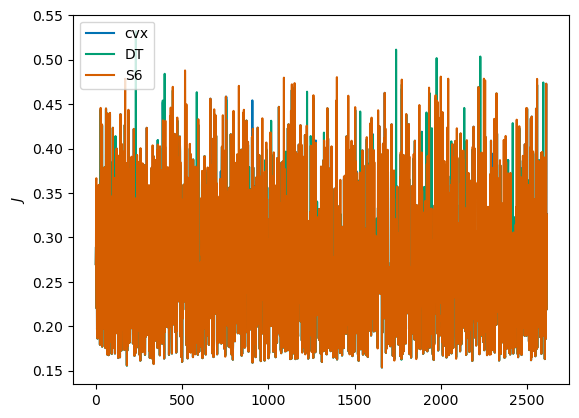

In [122]:
plt.figure()
plt.plot(J_min_scp_cvx_feas, label = 'cvx')
plt.plot(J_min_scp_DT_feas, label = 'DT')
plt.plot(J_min_scp_S6_feas, label = 'S6')
plt.ylabel(r'$J$')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Testset analysis as function of CTGS0.
CTGS0 >  0  . Test dataset size:  2428
J_scp_gain_mean_ctgs_0:  -2.570635051438376 J_scp_gain_std_ctgs_0:  12.08742173051601
J_scp_gain2_mean_ctgs_0:  -2.570635051438376
J_scp_percloss_cvx_mean_ctgs_0:  32.01134175839208 J_scp_percloss_cvx_std_ctgs_0:  22.523390795550434
J_scp_percloss_S6_mean_ctgs_0:  35.1641236502682 J_scp_percloss_S6_std_ctgs_0:  26.281311371368655
J_scp_percloss_DT_mean_ctgs_0:  32.357584531565806 J_scp_percloss_DT_std_ctgs_0:  24.511954910362174
iter_gain_mean_0:  -1.6243822075782537  iter_gain_std_0:  2.9604363027570417
iter_scp_mean_cvx_0:  4.518945634266887  iter_scp_std_cvx_0:  2.4525252175418366
iter_scp_mean_S6_0:  6.1433278418451405  iter_scp_std_S6_0:  3.6332100070217095
iter_scp_mean_DT_0:  3.2730642504118617  iter_scp_std_DT_0:  1.9132717781395034
DTruntime_gain_mean_0:  2.563583896325094  DTruntime_gain_std_0:  2.0861127574381633
S6runtime_gain_mean_0:  -4.815178909549211  S6runtime_gain_std_0:  3.528864981056915
r

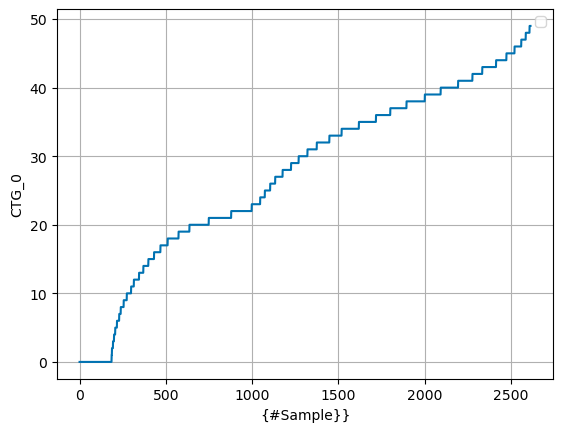

In [123]:
ctgs_range = range(0, 41, 1)
test_dataset_size = np.zeros(shape=(len(ctgs_range),), dtype=int)
J_scp_percgain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain2_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S6_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S6_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_scp_percloss_DT_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
iter_scp_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_gain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_gain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 

runtime_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S6_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S6_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S6_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S6_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_gain_mean_ctgsS6 = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsS6 = np.zeros(shape=(len(ctgs_range),), dtype=float)
runtime_gain_mean_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 

J_relgain_scp_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_S6_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_percgain_scp_S6_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_percgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT

n_unfeas_scp_cvx = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_S6 = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_DT = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT

ctgxx = 1

print('Testset analysis as function of CTGS0.')

fig, ax1 = plt.subplots()
ax1.plot(sorted(ctgs0_cvx_feas))
plt.legend(loc='best')
ax1.set_xlabel('{#Sample}}')
ax1.set_ylabel('CTG_0', color='k')
plt.grid(True)

iter = 0
for ctg in ctgs_range:

    ctg_mask = ctgs0_cvx_feas > ctg  # shape (n_feasible,), bool array

    ctgs0_cvx_feas_ctg = ctgs0_cvx_feas[ctg_mask]
    J_vect_scp_cvx_feas_ctg = J_vect_scp_cvx_feas[ctg_mask]
    J_vect_scp_S6_feas_ctg = J_vect_scp_S6_feas[ctg_mask]
    J_vect_scp_DT_feas_ctg = J_vect_scp_DT_feas[ctg_mask]

    J_cvx_feas_ctg = J_cvx_feas[ctg_mask]
    J_S6_feas_ctg = J_S6_feas[ctg_mask]
    J_DT_feas_ctg = J_DT_feas[ctg_mask]

    iter_scp_cvx_feas_ctg = iter_scp_cvx_feas[ctg_mask]
    iter_scp_S6_feas_ctg = iter_scp_S6_feas[ctg_mask]
    iter_scp_DT_feas_ctg = iter_scp_DT_feas[ctg_mask]

    runtime_cvx_feas_ctg = runtime_cvx_feas[ctg_mask]
    runtime_scp_cvx_feas_ctg = runtime_scp_cvx_feas[ctg_mask]

    runtime_S6_feas_ctg = runtime_S6_feas[ctg_mask]
    runtime_scp_S6_feas_ctg = runtime_scp_S6_feas[ctg_mask]

    runtime_DT_feas_ctg = runtime_DT_feas[ctg_mask]
    runtime_scp_DT_feas_ctg = runtime_scp_DT_feas[ctg_mask]

    if ctg == ctgxx:
        J_vect_scp_cvx_feas_ctgxx = J_vect_scp_cvx_feas_ctg
        J_vect_scp_S6_feas_ctgxx = J_vect_scp_S6_feas_ctg
        J_vect_scp_DT_feas_ctgxx = J_vect_scp_DT_feas_ctg    # Added line for DT
        J_cvx_feas_ctgxx = J_cvx_feas_ctg
        J_S6_feas_ctgxx = J_S6_feas_ctg
        J_DT_feas_ctgxx = J_DT_feas_ctg  # Added line for DT
        iter_scp_cvx_feas_ctgxx = iter_scp_cvx_feas_ctg
        iter_scp_S6_feas_ctgxx = iter_scp_S6_feas_ctg
        iter_scp_DT_feas_ctgxx = iter_scp_DT_feas_ctg  # Added line for DT

    test_dataset_size[iter] = len(ctgs0_cvx_feas_ctg)
    print('CTGS0 > ', ctg, ' . Test dataset size: ', test_dataset_size[iter])
    J_min_scp_cvx_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_cvx_feas_ctg])
    J_avg_scp_cvx_feas_ctg = J_min_scp_cvx_feas_ctg.mean()*1000.
    J_min_scp_S6_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_S6_feas_ctg]) 
    J_avg_scp_S6_feas_ctg = J_min_scp_S6_feas_ctg.mean()*1000.
    J_min_scp_DT_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_DT_feas_ctg]) 
    J_avg_scp_DT_feas_ctg = J_min_scp_DT_feas_ctg.mean()*1000.    # Added line for DT
    J_avg_cvx_feas_ctg = J_cvx_feas_ctg.mean()*1000.

    J_scp_percgain_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S6_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    J_scp_percgain_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_min_scp_S6_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    print('J_scp_gain_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter], 'J_scp_gain_std_ctgs_' + str(ctg) + ': ', J_scp_percgain_std_ctgs[iter])

    J_scp_percgain2_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S6_feas_ctg))/np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg))*100
    print('J_scp_gain2_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter])

    J_scp_percloss_cvx_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_cvx_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S6_mean_ctgs[iter] = np.mean((J_min_scp_S6_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S6_std_ctgs[iter] = np.std((J_min_scp_S6_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_DT_mean_ctgs[iter] = np.mean((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    J_scp_percloss_DT_std_ctgs[iter] = np.std((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    print('J_scp_percloss_cvx_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_mean_ctgs[iter], 'J_scp_percloss_cvx_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_std_ctgs[iter])
    print('J_scp_percloss_S6_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_S6_mean_ctgs[iter], 'J_scp_percloss_S6_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_S6_std_ctgs[iter])
    print('J_scp_percloss_DT_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_mean_ctgs[iter], 'J_scp_percloss_DT_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_std_ctgs[iter])

    iter_scp_mean_cvx_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg)
    iter_scp_mean_S6_ctgs[iter] = np.mean(iter_scp_S6_feas_ctg)
    iter_scp_mean_DT_ctgs[iter] = np.mean(iter_scp_DT_feas_ctg)  # Added line for DT
    iter_scp_std_cvx_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg)
    iter_scp_std_S6_ctgs[iter] = np.std(iter_scp_S6_feas_ctg)
    iter_scp_std_DT_ctgs[iter] = np.std(iter_scp_DT_feas_ctg)    # Added line for DT
    iter_scp_gain_mean_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg - iter_scp_S6_feas_ctg)
    iter_scp_gain_std_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg - iter_scp_S6_feas_ctg)
    print('iter_gain_mean_' + str(ctg) + ': ', iter_scp_gain_mean_ctgs[iter], ' iter_gain_std_' + str(ctg) + ': ', iter_scp_gain_std_ctgs[iter])
    print('iter_scp_mean_cvx_' + str(ctg) + ': ', iter_scp_mean_cvx_ctgs[iter], ' iter_scp_std_cvx_' + str(ctg) + ': ', iter_scp_std_cvx_ctgs[iter])
    print('iter_scp_mean_S6_' + str(ctg) + ': ', iter_scp_mean_S6_ctgs[iter], ' iter_scp_std_S6_' + str(ctg) + ': ', iter_scp_std_S6_ctgs[iter])
    print('iter_scp_mean_DT_' + str(ctg) + ': ', iter_scp_mean_DT_ctgs[iter], ' iter_scp_std_DT_' + str(ctg) + ': ', iter_scp_std_DT_ctgs[iter])

    runtime_mean_cvx_ctgs[iter] = np.mean(runtime_cvx_feas_ctg)
    runtime_mean_S6_ctgs[iter] = np.mean(runtime_S6_feas_ctg)
    runtime_mean_DT_ctgs[iter] = np.mean(runtime_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_ctgs[iter] = np.std(runtime_cvx_feas_ctg)
    runtime_std_S6_ctgs[iter] = np.std(runtime_S6_feas_ctg)
    runtime_std_DT_ctgs[iter] = np.std(runtime_DT_feas_ctg)    # Added line for DT
    runtime_mean_cvx_scp_ctgs[iter] = np.mean(runtime_scp_cvx_feas_ctg)
    runtime_mean_S6_scp_ctgs[iter] = np.mean(runtime_scp_S6_feas_ctg)
    runtime_mean_DT_scp_ctgs[iter] = np.mean(runtime_scp_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_scp_ctgs[iter] = np.std(runtime_scp_cvx_feas_ctg)
    runtime_std_S6_scp_ctgs[iter] = np.std(runtime_scp_S6_feas_ctg)
    runtime_std_DT_scp_ctgs[iter] = np.std(runtime_scp_DT_feas_ctg)    # Added line for DT

    runtime_mean_cvx_tot_ctgs[iter] = np.mean(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_mean_S6_tot_ctgs[iter] = np.mean(runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg)
    runtime_mean_DT_tot_ctgs[iter] = np.mean(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_std_cvx_tot_ctgs[iter] = np.std(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_std_S6_tot_ctgs[iter] = np.std(runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg)
    runtime_std_DT_tot_ctgs[iter] = np.std(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_gain_mean_ctgsS6[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg))
    runtime_gain_std_ctgsS6[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg))
    runtime_gain_mean_ctgsDT[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))
    runtime_gain_std_ctgsDT[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))

    # print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    # print('S6runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS6[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS6[iter])

    print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], ' DTruntime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    print('S6runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS6[iter], ' S6runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS6[iter])
    print('runtime_scp_mean_cvx_' + str(ctg) + ': ', runtime_mean_cvx_tot_ctgs[iter], ' runtime_scp_std_cvx_' + str(ctg) + ': ', runtime_std_cvx_tot_ctgs[iter])
    print('runtime_scp_mean_DT_' + str(ctg) + ': ', runtime_mean_DT_tot_ctgs[iter], ' runtime_scp_std_DT_' + str(ctg) + ': ', runtime_std_DT_tot_ctgs[iter])
    print('runtime_scp_mean_S6_' + str(ctg) + ': ', runtime_mean_S6_tot_ctgs[iter], ' runtime_scp_std_S6_' + str(ctg) + ': ', runtime_std_S6_tot_ctgs[iter])


    J_relgain_scp_cvx_mean_ctgs[iter] = J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg
    
    J_relgain_scp_DT_mean_ctgs[iter] = J_avg_scp_DT_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_DT_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_DT_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)

    J_relgain_scp_S6_mean_ctgs[iter] = J_avg_scp_S6_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_S6_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_S6_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)
    
    
    # total = np.sum(ctg_mask)
    # if total > 0:
    #     n_unfeas_scp_cvx[iter] = 100 * np.sum(~feasibility_list_CVX[ctg_mask]) / total
    #     n_unfeas_scp_DT[iter] = 100 * np.sum(~feasibility_list_DT[ctg_mask]) / total
    #     n_unfeas_scp_S6[iter] = 100 * np.sum(~feasibility_list_S6[ctg_mask]) / total
    # else:
    #     # Avoid division by zero if no samples >= ctg
    #     n_unfeas_scp_cvx[iter] = np.nan
    #     n_unfeas_scp_DT[iter] = np.nan
    #     n_unfeas_scp_S6[iter] = np.nan

    # # i_ctg2 = list(set(np.rint(test_dataset_ix[ctgs0_cvx>=ctg]).astype(int)))

    # # i_unfeas_scp_cvx_ctg = list(set(i_unfeas_scp_cvx).intersection(set(i_ctg2)))
    # # i_unfeas_scp_DT_ctg = list(set(i_unfeas_DT).intersection(set(i_ctg2)))
    # # i_unfeas_scp_S6_ctg = list(set(i_unfeas_S6).intersection(set(i_ctg2)))
    
    # # n_unfeas_scp_cvx[iter] = (len(i_unfeas_scp_cvx_ctg)/len(i_ctg2))*100
    # # n_unfeas_scp_DT[iter] = (len(i_unfeas_scp_DT_ctg)/len(i_ctg2))*100
    # # n_unfeas_scp_S6[iter] = (len(i_unfeas_scp_S6_ctg)/len(i_ctg2))*100

    iter += 1

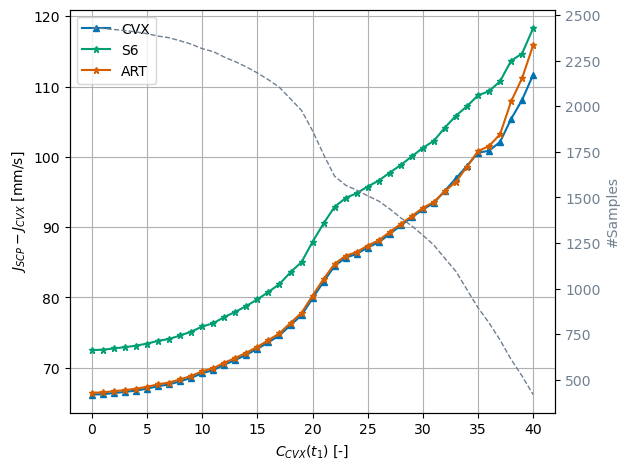

In [124]:
#%matplotlib ipympl
plt.style.use('seaborn-v0_8-colorblind')

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'$J_{SCP} - J_{CVX}$ [mm/s]', color='k')
ax1.plot(ctgs_range, J_relgain_scp_cvx_mean_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, J_relgain_scp_S6_mean_ctgs, marker='*', markersize=5,  label='S6')
    ax1.plot(ctgs_range, J_relgain_scp_DT_mean_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, J_relgain_scp_S6_mean_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
# plt.hlines(0, 0, 51, linestyle='--', color='k')
# plt.ylim([-0.01, 0.01])
plt.legend(loc='best')
plt.grid(True)
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_il.png', dpi=600)


In [125]:
print(100*J_percgain_scp_S6_mean_ctgs)
print(100*J_percgain_scp_DT_mean_ctgs)

[ -9.55780744  -9.55780969  -9.55788507  -9.55796442  -9.55821766
  -9.55903034  -9.56082165  -9.56246139  -9.56749565  -9.57256142
  -9.58283809  -9.59183714  -9.60868485  -9.62560381  -9.64981
  -9.684268    -9.72549551  -9.79184405  -9.9007133   -9.75043358
 -10.06090323 -10.07376785  -9.95999755  -9.90353668 -10.02577976
  -9.95696693  -9.98607433  -9.80524034  -9.50084074  -9.50295328
  -9.44532738  -9.46851332  -9.4199629   -9.1818281   -8.60442644
  -8.10554733  -8.39492566  -8.44801907  -7.86645362  -6.09475539
  -5.93146024]
[-0.39381118 -0.39384494 -0.39396446 -0.39411338 -0.39418044 -0.39452579
 -0.39487274 -0.39509317 -0.39537775 -0.39640463 -0.39720475 -0.39760015
 -0.39910394 -0.39999707 -0.40132379 -0.40339929 -0.40699375 -0.41171075
 -0.41919665 -0.42630533 -0.48987238 -0.46293922 -0.35802213 -0.31246923
 -0.31726205 -0.32057741 -0.32635778 -0.33361611 -0.20685813 -0.21473151
 -0.22115951 -0.17491944  0.08876035  0.51074604  0.11785614 -0.22379788
 -0.66247891 -1.070694

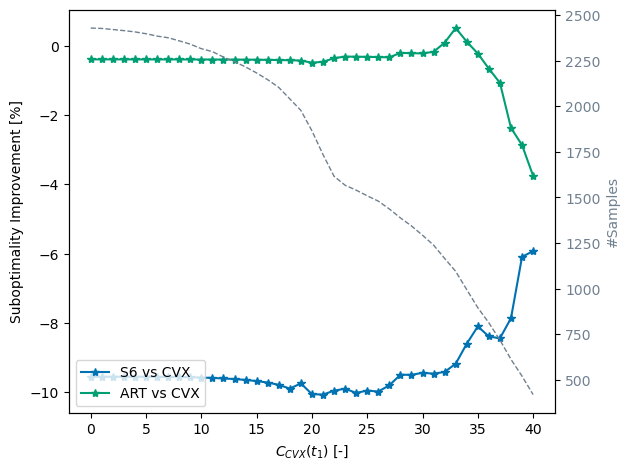

In [126]:

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Suboptimality Improvement [%]', color='k')
if rl:
    ax1.plot(ctgs_range, J_percgain_scp_S6_mean_ctgs*100., marker='*', label='S6 vs CVX')
    ax1.plot(ctgs_range, J_percgain_scp_DT_mean_ctgs*100., marker='*', label='ART vs CVX')
else:
    ax1.plot(ctgs_range, J_percgain_scp_S6_mean_ctgs*100., marker='*', label='ART-IL vs CVX')
ax1.tick_params(axis='y', labelcolor=color)
if rl:
    plt.legend(loc='lower left')
else:
    plt.legend(loc='lower left')
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_il.png', dpi=600)




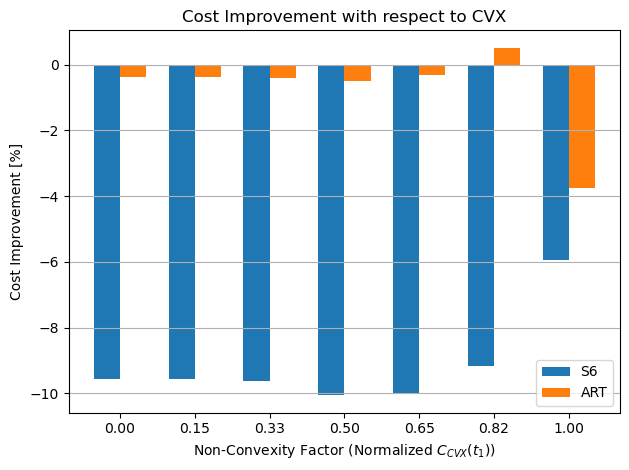

In [127]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean cost values at selected CTG points ===
J_S6_sample = J_percgain_scp_S6_mean_ctgs[ctg_sample_points]
J_DT_sample = J_percgain_scp_DT_mean_ctgs[ctg_sample_points]
# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s6 = 100 * J_S6_sample
gain_dt = 100 * J_DT_sample

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, gain_s6, width=bar_width, label='S6', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Cost Improvement [%]')
ax.set_title('Cost Improvement with respect to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


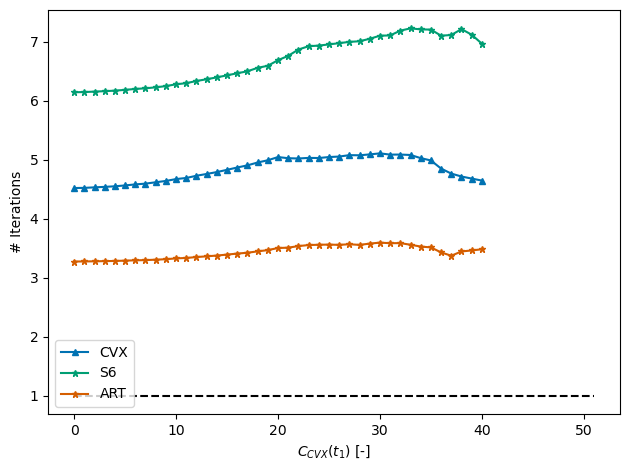

In [128]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'# Iterations', color='k')
ax1.plot(ctgs_range, iter_scp_mean_cvx_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, iter_scp_mean_S6_ctgs, marker='*', markersize=5,  label='S6')
    ax1.plot(ctgs_range, iter_scp_mean_DT_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, iter_scp_mean_S6_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(1, 0, 51, linestyle='--', color='k')
plt.legend(loc='lower left')
# ax2 = ax1.twinx() 
# color = 'slategray'
# ax2.set_ylabel('#Samples', color=color)
# ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
# ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_il.png', dpi=600)



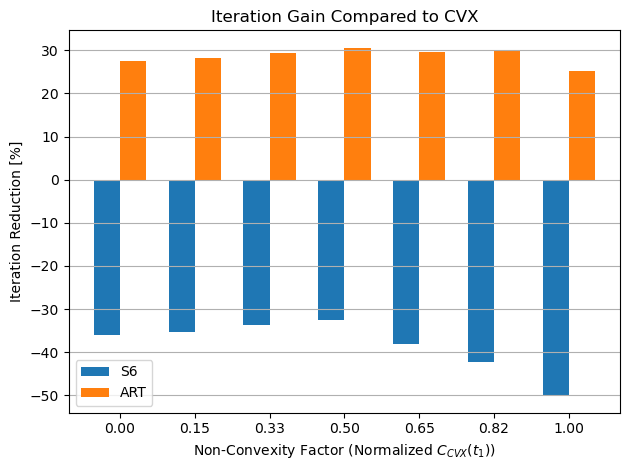

In [129]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean iteration values at selected CTG points ===
cvx_iter_sample = iter_scp_mean_cvx_ctgs[ctg_sample_points]
s6_iter_sample = iter_scp_mean_S6_ctgs[ctg_sample_points]
dt_iter_sample = iter_scp_mean_DT_ctgs[ctg_sample_points]

# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s6 = 100 * (cvx_iter_sample - s6_iter_sample) / cvx_iter_sample
gain_dt = 100 * (cvx_iter_sample - dt_iter_sample) / cvx_iter_sample

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, gain_s6, width=bar_width, label='S6', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Iteration Reduction [%]')
ax.set_title('Iteration Gain Compared to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


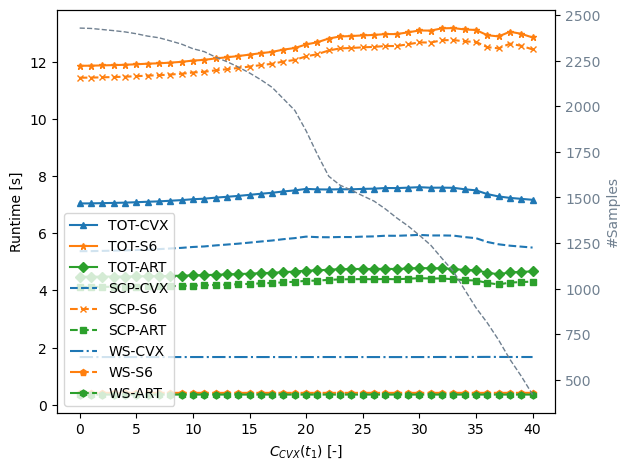

In [130]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Runtime [s]', color='k')

# Assign different markers and colors
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs, marker='^', markersize=5, color='#1f77b4', label='TOT-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S6_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-S6')
    ax1.plot(ctgs_range, runtime_mean_DT_tot_ctgs, marker='D', markersize=5, color='#2ca02c', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S6_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_scp_ctgs, linestyle='--', color='#1f77b4', label='SCP-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S6_scp_ctgs, linestyle='--',color='#ff7f0e', marker='x', markersize=5, label='SCP-S6')
    ax1.plot(ctgs_range, runtime_mean_DT_scp_ctgs, linestyle='--', color='#2ca02c', marker='s', markersize=5, label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S6_scp_ctgs, linestyle='--', color='#D55E00', marker='x', markersize=5, label='SCP-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_ctgs, linestyle='-.', color='#1f77b4', label='WS-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S6_ctgs, linestyle='-.', color='#ff7f0e', marker='p', markersize=5, label='WS-S6')
    ax1.plot(ctgs_range, runtime_mean_DT_ctgs, linestyle='-.', color='#2ca02c', marker='h', markersize=5, label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S6_ctgs, linestyle='-.', color='orangered', marker='p', markersize=5, label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor='k')
plt.legend(loc='lower left')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_il.png', dpi=600)


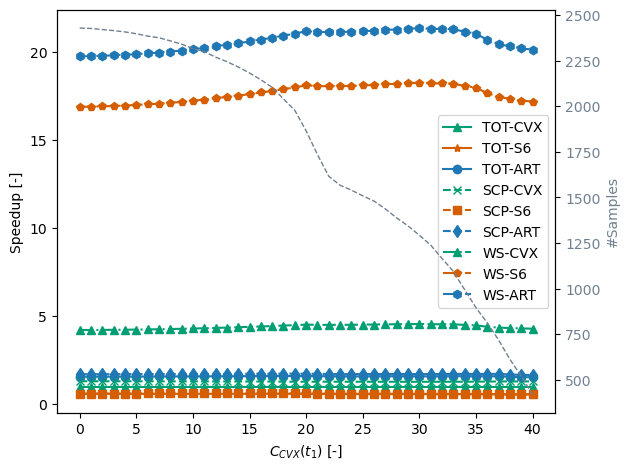

In [131]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Speedup [-]', color='k')

# CVX Type - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_tot_ctgs, linestyle='-', marker='^', color='#009E73', label='TOT-CVX')

# S6 Type - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-S6')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_tot_ctgs, linestyle='-', marker='o', color='#1f77b4', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-ART-IL')

# SCP-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_scp_ctgs, linestyle='--', color='#009E73', marker='x', label='SCP-CVX')

# SCP-S6 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_scp_ctgs, linestyle='--', color='#D55E00', marker='s', label='SCP-S6')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_scp_ctgs, linestyle='--', color='#1f77b4', marker='d', label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_scp_ctgs, linestyle='--', color='#D55E00', marker='*', label='SCP-ART-IL')

# WS-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_ctgs, linestyle='-.', color='#009E73', marker='^', label='WS-CVX')

# WS-S6 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_ctgs, linestyle='-.', color='#D55E00', marker='p', label='WS-S6')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_ctgs, linestyle='-.', color='#1f77b4', marker='h', label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_ctgs, linestyle='-.', color='orangered', marker='s', label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc='best')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_il.png', dpi=600)


FORECASTING ANALYSIS BETWEEN ART AND S4D

In [132]:
import os
import sys

root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

print(sys.path)

import numpy as np
import numpy.linalg as la
import numpy.matlib as matl
import matplotlib.pyplot as plt

from ff_scenario import n_obs, obs, robot_radius, safety_margin, goal_region, start_region, iter_max_SCP


traj_data_S4 = np.load(root_folder + '/optimization/saved_files/prediction_analysisS4/pred_analysis_2_checkpoint_ff_GSA_vs_checkpoint_ff_S4_gsa_test3000.npz',allow_pickle=True)


['/home/arpit/miniforge3/envs/MAMBA/lib/python310.zip', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/lib-dynload', '', '/home/arpit/.local/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/mamba_ssm-2.2.4-py3.10-linux-x86_64.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools-75.6.0-py3.10.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools/_vendor', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/tran

In [133]:
# ==== Feasibility flags ====
feasibility_list_CVX = traj_data_S4['feasibility_list_CVX']
feasibility_list_DT = traj_data_S4['feasibility_list_DT']
feasibility_list_S4 = traj_data_S4['feasibility_list_S4']

# ==== Costs ====
ctgs0_cvx = traj_data_S4['ctgs0_cvx']
J_list_CVX = traj_data_S4['J_list_CVX']
J_list_DT = traj_data_S4['J_list_DT']
J_list_S4 = traj_data_S4['J_list_S4']

# ==== J vectors ====
J_vect_scp_list_CVX = traj_data_S4['J_vect_scp_list_CVX']
J_vect_scp_list_DT = traj_data_S4['J_vect_scp_list_DT']
J_vect_scp_list_S4 = traj_data_S4['J_vect_scp_list_S4']

# ==== Warmstart runtime metrics ====
runtime_list_CVX = traj_data_S4['runtime_list_CVX']
runtime_list_DT = traj_data_S4['runtime_list_DT']
runtime_list_S4 = traj_data_S4['runtime_list_S4']

# ==== SCP runtime metrics ====
runtime_scp_list_CVX = traj_data_S4['runtime_scp_list_CVX']
runtime_scp_list_DT = traj_data_S4['runtime_scp_list_DT']
runtime_scp_list_S4 = traj_data_S4['runtime_scp_list_S4']

# ==== SCP Iterations ====
iter_scp_list_CVX = traj_data_S4['iter_scp_list_CVX']
iter_scp_list_DT = traj_data_S4['iter_scp_list_DT']
iter_scp_list_S4 = traj_data_S4['iter_scp_list_S4']

# ==== Errors ====
trajectory_rmse_list_DT = traj_data_S4['trajectory_rmse_list_DT']
trajectory_rmse_list_S4 = traj_data_S4['trajectory_rmse_list_S4']
control_error_list_DT = traj_data_S4['control_error_list_DT']
control_error_list_S4 = traj_data_S4['control_error_list_S4']
final_state_error_list_DT = traj_data_S4['final_state_error_list_DT']
final_state_error_list_S4 = traj_data_S4['final_state_error_list_S4']

In [134]:
num_true = np.sum(feasibility_list_DT)  # Counts True values (True is 1, False is 0)
num_false = len(feasibility_list_DT) - num_true  # Remaining are False
num_true_S4 = np.sum(feasibility_list_S4)  # Counts True values (True is 1, False is 0)
num_false_S4 = len(feasibility_list_S4) - num_true_S4   # Remaining are False
print(f"#Feasible ART: {num_true}, #Not-Feasible ART: {num_false}")
print(f"#Feasible S4: {num_true_S4}, #Not-Feasible S4: {num_false_S4}")

#Feasible ART: 2986, #Not-Feasible ART: 14123
#Feasible S4: 2086, #Not-Feasible S4: 15023


In [135]:
combined_feasibility_mask = feasibility_list_DT & feasibility_list_S4 & feasibility_list_CVX
print(f"Feasible in all models: {np.sum(combined_feasibility_mask)}")

Feasible in all models: 2076


In [136]:
# === Masking for DT ===
filtered_trajectory_rmse_DT = trajectory_rmse_list_DT[combined_feasibility_mask]
filtered_control_error_DT = control_error_list_DT[combined_feasibility_mask]
filtered_final_state_error_DT = final_state_error_list_DT[combined_feasibility_mask]
filtered_runtime_DT = runtime_list_DT[combined_feasibility_mask]
filtered_runtime_scp_DT = runtime_scp_list_DT[combined_feasibility_mask]
filtered_iter_scp_DT = iter_scp_list_DT[combined_feasibility_mask]
filtered_J_list_DT = J_list_DT[combined_feasibility_mask]
filtered_J_vect_scp_list_DT = J_vect_scp_list_DT[combined_feasibility_mask]

# === Masking for S4 ===
filtered_trajectory_rmse_S4 = trajectory_rmse_list_S4[combined_feasibility_mask]
filtered_control_error_S4 = control_error_list_S4[combined_feasibility_mask]
filtered_final_state_error_S4 = final_state_error_list_S4[combined_feasibility_mask]
filtered_runtime_S4 = runtime_list_S4[combined_feasibility_mask]
filtered_runtime_scp_S4 = runtime_scp_list_S4[combined_feasibility_mask]
filtered_iter_scp_S4 = iter_scp_list_S4[combined_feasibility_mask]
filtered_J_list_S4 = J_list_S4[combined_feasibility_mask]
filtered_J_vect_scp_list_S4 = J_vect_scp_list_S4[combined_feasibility_mask]

# === Masking for CVX ===
filtered_runtime_CVX = runtime_list_CVX[combined_feasibility_mask]
filtered_runtime_scp_CVX = runtime_scp_list_CVX[combined_feasibility_mask]
filtered_iter_scp_CVX = iter_scp_list_CVX[combined_feasibility_mask]
filtered_ctgs0_cvx = ctgs0_cvx[combined_feasibility_mask]
filtered_J_list_CVX = J_list_CVX[combined_feasibility_mask]
filtered_J_vect_scp_list_CVX = J_vect_scp_list_CVX[combined_feasibility_mask]



print(f" # Feasible Trajectories for ART: {len(filtered_trajectory_rmse_DT)}")
print(f" # Feasible Trajectories for S4: {len(filtered_trajectory_rmse_S4)}")
print(f" # Feasible Trajectories for CVX: {len(filtered_runtime_scp_CVX)}")

 # Feasible Trajectories for ART: 2076
 # Feasible Trajectories for S4: 2076
 # Feasible Trajectories for CVX: 2076


In [137]:
# ART forecasting analysis

# === DT Metrics ===
mean_trajectory_rmse_DT = np.mean(filtered_trajectory_rmse_DT)
std_trajectory_rmse_DT = np.std(filtered_trajectory_rmse_DT)

mean_control_error_DT = np.mean(filtered_control_error_DT)
std_control_error_DT = np.std(filtered_control_error_DT)

mean_final_state_error_DT = np.mean(filtered_final_state_error_DT)
std_final_state_error_DT = np.std(filtered_final_state_error_DT)

mean_runtime_DT = np.mean(filtered_runtime_DT)
std_runtime_DT = np.std(filtered_runtime_DT)

mean_runtime_scp_DT = np.mean(filtered_runtime_scp_DT)
std_runtime_scp_DT = np.std(filtered_runtime_scp_DT)

mean_iter_scp_DT = np.mean(filtered_iter_scp_DT)
std_iter_scp_DT = np.std(filtered_iter_scp_DT)

mean_J_list_DT = np.mean(filtered_J_list_DT)
std_J_list_DT = np.std(filtered_J_list_DT)

min_J_vect_scp_DT = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_DT])
mean_convergence_cost_DT = np.mean(min_J_vect_scp_DT)
std_convergence_cost_DT = np.std(min_J_vect_scp_DT)

# === S4 Metrics ===
mean_trajectory_rmse_S4 = np.mean(filtered_trajectory_rmse_S4)
std_trajectory_rmse_S4 = np.std(filtered_trajectory_rmse_S4)

mean_control_error_S4 = np.mean(filtered_control_error_S4)
std_control_error_S4 = np.std(filtered_control_error_S4)

mean_final_state_error_S4 = np.mean(filtered_final_state_error_S4)
std_final_state_error_S4 = np.std(filtered_final_state_error_S4)

mean_runtime_S4 = np.mean(filtered_runtime_S4)
std_runtime_S4 = np.std(filtered_runtime_S4)

mean_runtime_scp_S4 = np.mean(filtered_runtime_scp_S4)
std_runtime_scp_S4 = np.std(filtered_runtime_scp_S4)

mean_iter_scp_S4 = np.mean(filtered_iter_scp_S4)
std_iter_scp_S4 = np.std(filtered_iter_scp_S4)

mean_J_list_S4 = np.mean(filtered_J_list_S4)
std_J_list_S4 = np.std(filtered_J_list_S4)

min_J_vect_scp_S4 = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_S4])
mean_convergence_cost_S4 = np.mean(min_J_vect_scp_S4)
std_convergence_cost_S4 = np.std(min_J_vect_scp_S4)

# === CVX Metrics ===
mean_runtime_CVX = np.mean(filtered_runtime_CVX)
std_runtime_CVX = np.std(filtered_runtime_CVX)

mean_runtime_scp_CVX = np.mean(filtered_runtime_scp_CVX)
std_runtime_scp_CVX = np.std(filtered_runtime_scp_CVX)

mean_iter_scp_CVX = np.mean(filtered_iter_scp_CVX)
std_iter_scp_CVX = np.std(filtered_iter_scp_CVX)

mean_J_list_CVX = np.mean(filtered_J_list_CVX)
std_J_list_CVX = np.std(filtered_J_list_CVX)

min_J_vect_scp_CVX = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_CVX])
mean_convergence_cost_CVX = np.mean(min_J_vect_scp_CVX)
std_convergence_cost_CVX = np.std(min_J_vect_scp_CVX)


# === Print Results ===
print("Decision Transformer (DT) Mean ± Std:")
print(f"Trajectory RMSE: {mean_trajectory_rmse_DT:.4f} ± {std_trajectory_rmse_DT:.4f}")
print(f"Control Error: {mean_control_error_DT:.4f} ± {std_control_error_DT:.4f}")
print(f"Final State Error: {mean_final_state_error_DT:.4f} ± {std_final_state_error_DT:.4f}")
print(f"Runtime: {mean_runtime_DT:.4f} ± {std_runtime_DT:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_DT:.4f} ± {std_runtime_scp_DT:.4f}")
print(f"Iterations SCP: {mean_iter_scp_DT:.2f} ± {std_iter_scp_DT:.2f}")
print(f"Converged Cost WS: {mean_J_list_DT:.4f} ± {std_J_list_DT:.4f}")
print(f"Converged Cost: {mean_convergence_cost_DT:.4f} ± {std_convergence_cost_DT:.4f}")

print("\nS4 Model Mean ± Std:")
print(f"Trajectory RMSE: {mean_trajectory_rmse_S4:.4f} ± {std_trajectory_rmse_S4:.4f}")
print(f"Control Error: {mean_control_error_S4:.4f} ± {std_control_error_S4:.4f}")
print(f"Final State Error: {mean_final_state_error_S4:.4f} ± {std_final_state_error_S4:.4f}")
print(f"Runtime: {mean_runtime_S4:.4f} ± {std_runtime_S4:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_S4:.4f} ± {std_runtime_scp_S4:.4f}")
print(f"Iterations SCP: {mean_iter_scp_S4:.2f} ± {std_iter_scp_S4:.2f}")
print(f"Converged Cost WS: {mean_J_list_S4:.4f} ± {std_J_list_S4:.4f}")
print(f"Converged Cost: {mean_convergence_cost_S4:.4f} ± {std_convergence_cost_S4:.4f}")

print("\nCVX Warm Start Mean ± Std:")
print(f"Runtime: {mean_runtime_CVX:.4f} ± {std_runtime_CVX:.4f}")
print(f"Runtime SCP: {mean_runtime_scp_CVX:.4f} ± {std_runtime_scp_CVX:.4f}")
print(f"Iterations SCP: {mean_iter_scp_CVX:.2f} ± {std_iter_scp_CVX:.2f}")
print(f"Converged Cost WS: {mean_J_list_CVX:.4f} ± {std_J_list_CVX:.4f}")
print(f"Converged Cost: {mean_convergence_cost_CVX:.4f} ± {std_convergence_cost_CVX:.4f}")



Decision Transformer (DT) Mean ± Std:
Trajectory RMSE: 0.0070 ± 0.0309
Control Error: 0.0002 ± 0.0007
Final State Error: 0.0051 ± 0.0007
Runtime: 0.3993 ± 0.0175
Runtime SCP: 3.6861 ± 1.5160
Iterations SCP: 2.92 ± 1.61
Converged Cost WS: 0.2542 ± 0.0536
Converged Cost: 0.2456 ± 0.0585

S4 Model Mean ± Std:
Trajectory RMSE: 0.0138 ± 0.0494
Control Error: 0.0004 ± 0.0008
Final State Error: 0.0051 ± 0.0007
Runtime: 0.3615 ± 0.0042
Runtime SCP: 11.1842 ± 4.0842
Iterations SCP: 6.57 ± 3.42
Converged Cost WS: 0.1983 ± 0.0161
Converged Cost: 0.2426 ± 0.0529

CVX Warm Start Mean ± Std:
Runtime: 1.5935 ± 0.0971
Runtime SCP: 4.3860 ± 2.0189
Iterations SCP: 3.64 ± 2.14
Converged Cost WS: 0.1951 ± 0.0261
Converged Cost: 0.2446 ± 0.0567


WARMSTARTING ANALYSIS BETWEEN ART AND S4D

In [138]:
print("Size of ctgs0_cvx:", len(ctgs0_cvx))

ctgs0_cvx_feas = filtered_ctgs0_cvx
J_vect_scp_cvx_feas = filtered_J_vect_scp_list_CVX
J_vect_scp_DT_feas = filtered_J_vect_scp_list_DT
J_vect_scp_S4_feas = filtered_J_vect_scp_list_S4

J_cvx_feas = filtered_J_list_CVX
J_DT_feas = filtered_J_list_DT
J_S4_feas = filtered_J_list_S4

iter_scp_cvx_feas = filtered_iter_scp_CVX
iter_scp_DT_feas = filtered_iter_scp_DT
iter_scp_S4_feas = filtered_iter_scp_S4

runtime_cvx_feas = filtered_runtime_CVX
runtime_scp_cvx_feas = filtered_runtime_scp_CVX

runtime_DT_feas = filtered_runtime_DT
runtime_S4_feas = filtered_runtime_S4

runtime_scp_DT_feas = filtered_runtime_scp_DT
runtime_scp_S4_feas = filtered_runtime_scp_S4

print('Full feasible nncvx testset analysis. Test dataset size: ', len(ctgs0_cvx_feas))

J_min_scp_cvx_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_CVX]) # final converged cost at the end of optimization solution
J_min_scp_DT_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_DT])
J_min_scp_S4_feas = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_list_S4])

J_scp_gain_mean_DT = np.mean(J_min_scp_cvx_feas - J_min_scp_DT_feas)
J_scp_gain_std_DT = np.std(J_min_scp_cvx_feas - J_min_scp_DT_feas)
print('J_scp_gain_mean_DT:', J_scp_gain_mean_DT, 'J_scp_gain_std_DT:', J_scp_gain_std_DT)
J_scp_gain_mean = np.mean(J_min_scp_cvx_feas - J_min_scp_S4_feas)
J_scp_gain_std = np.std(J_min_scp_cvx_feas - J_min_scp_S4_feas)
print('J_scp_gain_mean_S4:', J_scp_gain_mean, 'J_scp_gain_std_S4:', J_scp_gain_std)

# Percentage Calculation
J_scp_gain_mean_perc_DT = np.mean((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
# print('idx max cost perc improvement DT: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)]])
J_scp_gain_mean_perc_S4 = np.mean((J_min_scp_cvx_feas - J_min_scp_S4_feas)/J_min_scp_cvx_feas*100)
# print('idx max cost perc improvement S4: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_S4_feas)/J_min_scp_cvx_feas)]])

# Indexes of best trajectories with respect to assumption that we achived lower loss for our model compared to cvx relaxation
ix_sort_DT = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)
# print('First ten i with maximum cost perc improvement DT: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort_DT][:10])])
ix_sort = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_S4_feas)/J_min_scp_cvx_feas)
# print('First ten i with maximum cost perc improvement S4: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort][:10])])

J_scp_gain_std_perc_DT = np.std((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc DT: ', J_scp_gain_mean_perc_DT, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc_DT)
J_scp_gain_std_perc = np.std((J_min_scp_cvx_feas - J_min_scp_S4_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc S4: ', J_scp_gain_mean_perc_S4, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc)

iter_scp_mean_cvx = np.mean(iter_scp_cvx_feas)
iter_scp_mean_DT = np.mean(iter_scp_DT_feas)
iter_scp_mean_S4 = np.mean(iter_scp_S4_feas)
iter_scp_gain_mean_DT = np.mean(iter_scp_cvx_feas - iter_scp_DT_feas)
iter_scp_gain_std_DT = np.std(iter_scp_cvx_feas - iter_scp_DT_feas)
print('iter_gain_mean DT: ', iter_scp_gain_mean_DT, ' iter_gain_std DT: ', iter_scp_gain_std_DT)
iter_scp_gain_meanS4 = np.mean(iter_scp_cvx_feas - iter_scp_S4_feas)
iter_scp_gain_stdS4 = np.std(iter_scp_cvx_feas - iter_scp_S4_feas)
print('iter_gain_mean S4: ', iter_scp_gain_meanS4, ' iter_gain_std S4: ', iter_scp_gain_stdS4)
print('iter_scp_mean_cvx: ', iter_scp_mean_cvx, ' iter_scp_mean_S4 : ', iter_scp_mean_S4,' iter_scp_mean_DT : ', iter_scp_mean_DT)

runtime_scp_mean_cvx = np.mean(runtime_cvx_feas + runtime_scp_cvx_feas)
runtime_scp_mean_DT = np.mean(runtime_DT_feas + runtime_scp_DT_feas)
runtime_scp_mean_S4 = np.mean(runtime_S4_feas + runtime_scp_S4_feas)
runtime_gain_meanDT = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_stdDT = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_meanS4 = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S4_feas + runtime_scp_S4_feas))
runtime_gain_stdS4 = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S4_feas + runtime_scp_S4_feas))
print('runtime_gain_mean DT: ', runtime_gain_meanDT, ' runtime_gain_std DT: ', runtime_gain_stdDT)
print('runtime_gain_mean S4: ', runtime_gain_meanS4, ' runtime_gain_std S4: ', runtime_gain_stdS4)
print('runtime_ws_mean_cvx: ', np.mean(runtime_cvx_feas), ' runtime_ws_mean_S4: ', np.mean(runtime_S4_feas), ' runtime_ws_mean_DT: ', np.mean(runtime_DT_feas))
print('runtime_scp_mean_cvx: ', runtime_scp_mean_cvx, ' runtime_scp_mean_S4: ', runtime_scp_mean_S4, ' runtime_scp_mean_DT: ', runtime_scp_mean_DT)

ind_sort_J_cvx_feas = np.argsort(J_cvx_feas)
J_cvx_feas_sort = J_cvx_feas[ind_sort_J_cvx_feas]
perc_opt_loss_DT = (J_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_S4 = (J_S4_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_cvx = (J_min_scp_cvx_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_DT  = (J_min_scp_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_S4  = (J_min_scp_S4_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100

ind_sort_ctgs0_cvx = np.argsort(ctgs0_cvx_feas)
ctgs0_cvx_sort = ctgs0_cvx_feas[ind_sort_ctgs0_cvx]
perc_opt_loss_DT_ctgs = (J_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_S4_ctgs = (J_S4_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_cvx_ctgs = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_DT_ctgs = (J_min_scp_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_scp_S4_ctgs = (J_min_scp_S4_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100


perc_cost_gain_ctgsDT = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_DT_feas[ind_sort_ctgs0_cvx])/J_min_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_cost_gain_ctgsS4 = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_S4_feas[ind_sort_ctgs0_cvx]) / J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100
iter_gain_ctgsDT = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_DT_feas[ind_sort_ctgs0_cvx])
iter_gain_ctgsS4 = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_S4_feas[ind_sort_ctgs0_cvx])
perc_runtime_gain_ctgsDT = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_DT_feas[ind_sort_ctgs0_cvx])/runtime_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_runtime_gain_ctgsS4 = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_S4_feas[ind_sort_ctgs0_cvx]) / runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100

Delta_J_mean_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # Original DT line
Delta_J_std_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S4 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S4 = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # DT version
count_scp_S4 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float) 
Delta_J_std_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S4_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S4_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_DT_2_cvx = np.mean((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_std_DT_2_cvx = np.std((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_mean_S4_2_cvx = np.mean((J_S4_feas - J_cvx_feas) / J_cvx_feas)
Delta_J_std_S4_2_cvx = np.std((J_S4_feas - J_cvx_feas) / J_cvx_feas)

for i in range(iter_max_SCP):
    # === CVX ===
    J_vals_cvx = []
    J_vals_cvx_2_cvx = []

    for j in range(len(J_vect_scp_cvx_feas)):
        if i < len(J_vect_scp_cvx_feas[j]):
            val = J_vect_scp_cvx_feas[j][i]
            if val > 1e10:
                val = J_min_scp_cvx_feas[j]
            J_vals_cvx.append(val)
            J_vals_cvx_2_cvx.append(val)
        else:
            # Pad with final value (or J_min) if shorter than iter_max_SCP
            J_vals_cvx.append(J_min_scp_cvx_feas[j])
            J_vals_cvx_2_cvx.append(J_min_scp_cvx_feas[j])

    J_vals_cvx = np.array(J_vals_cvx)
    Delta_J_mean_scp_cvx[i] = np.mean((J_vals_cvx - J_min_scp_cvx_feas) / J_min_scp_cvx_feas)
    Delta_J_std_scp_cvx[i] = np.std((J_vals_cvx - J_min_scp_cvx_feas) / J_min_scp_cvx_feas)
    Delta_J_mean_scp_cvx_2_cvx[i] = np.mean((J_vals_cvx_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_cvx_2_cvx[i] = np.std((J_vals_cvx_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_cvx[i] = len(J_vals_cvx)

    # === Repeat similar logic for DT ===
    J_vals_DT = []
    J_vals_DT_2_cvx = []

    for j in range(len(J_vect_scp_DT_feas)):
        if i < len(J_vect_scp_DT_feas[j]):
            val = J_vect_scp_DT_feas[j][i]
            if val > 1e10:
                val = J_min_scp_DT_feas[j]
            J_vals_DT.append(val)
            J_vals_DT_2_cvx.append(val)
        else:
            J_vals_DT.append(J_min_scp_DT_feas[j])
            J_vals_DT_2_cvx.append(J_min_scp_DT_feas[j])

    J_vals_DT = np.array(J_vals_DT)
    Delta_J_mean_scp_DT[i] = np.mean((J_vals_DT - J_min_scp_DT_feas) / J_min_scp_DT_feas)
    Delta_J_std_scp_DT[i] = np.std((J_vals_DT - J_min_scp_DT_feas) / J_min_scp_DT_feas)
    Delta_J_mean_scp_DT_2_cvx[i] = np.mean((J_vals_DT_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_DT_2_cvx[i] = np.std((J_vals_DT_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_DT[i] = len(J_vals_DT)

    # === Repeat for S4 ===
    J_vals_S4 = []
    J_vals_S4_2_cvx = []

    for j in range(len(J_vect_scp_S4_feas)):
        if i < len(J_vect_scp_S4_feas[j]):
            val = J_vect_scp_S4_feas[j][i]
            if val > 1e10:
                val = J_min_scp_S4_feas[j]
            J_vals_S4.append(val)
            J_vals_S4_2_cvx.append(val)
        else:
            J_vals_S4.append(J_min_scp_S4_feas[j])
            J_vals_S4_2_cvx.append(J_min_scp_S4_feas[j])

    J_vals_S4 = np.array(J_vals_S4)
    Delta_J_mean_scp_S4[i] = np.mean((J_vals_S4 - J_min_scp_S4_feas) / J_min_scp_S4_feas)
    Delta_J_std_scp_S4[i] = np.std((J_vals_S4 - J_min_scp_S4_feas) / J_min_scp_S4_feas)
    Delta_J_mean_scp_S4_2_cvx[i] = np.mean((J_vals_S4_2_cvx - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_S4_2_cvx[i] = np.std((J_vals_S4_2_cvx - J_cvx_feas) / J_cvx_feas)
    count_scp_S4[i] = len(J_vals_S4)


Size of ctgs0_cvx: 17109
Full feasible nncvx testset analysis. Test dataset size:  2076
J_scp_gain_mean_DT: -0.0009969337473661108 J_scp_gain_std_DT: 0.02136440367030791
J_scp_gain_mean_S4: 0.001931373452015505 J_scp_gain_std_S4: 0.016153082684622858
J_scp_gain_mean_perc DT:  -0.49949880291213294  J_scp_gain_std_perc:  7.293589362803054
J_scp_gain_mean_perc S4:  0.4528061391421402  J_scp_gain_std_perc:  4.376715551505573
iter_gain_mean DT:  0.7249518304431599  iter_gain_std DT:  1.8690187186608758
iter_gain_mean S4:  -2.926782273603083  iter_gain_std S4:  2.5691656602074993
iter_scp_mean_cvx:  3.6401734104046244  iter_scp_mean_S4 :  6.5669556840077075  iter_scp_mean_DT :  2.9152215799614645
runtime_gain_mean DT:  1.8941462008939314  runtime_gain_std DT:  1.7694452748669236
runtime_gain_mean S4:  -5.5661948250897355  runtime_gain_std S4:  2.984511088399391
runtime_ws_mean_cvx:  1.5934859330484172  runtime_ws_mean_S4:  0.3615304702508886  runtime_ws_mean_DT:  0.39929016614924967
runtime_

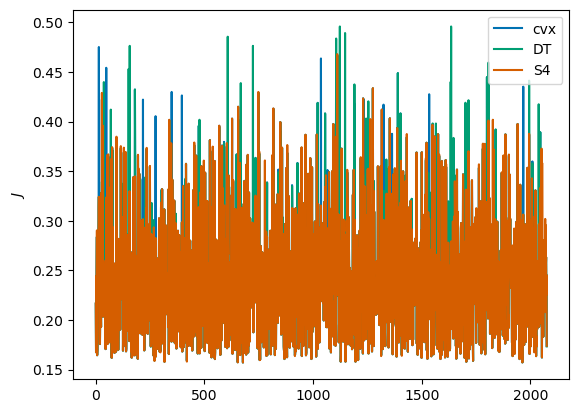

In [139]:
plt.figure()
plt.plot(J_min_scp_cvx_feas, label = 'cvx')
plt.plot(J_min_scp_DT_feas, label = 'DT')
plt.plot(J_min_scp_S4_feas, label = 'S4')
plt.ylabel(r'$J$')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Testset analysis as function of CTGS0.
CTGS0 >  0  . Test dataset size:  1884
J_scp_gain_mean_ctgs_0:  0.49505633312620123 J_scp_gain_std_ctgs_0:  4.59206001252449
J_scp_gain2_mean_ctgs_0:  0.49505633312620123
J_scp_percloss_cvx_mean_ctgs_0:  27.335132863013378 J_scp_percloss_cvx_std_ctgs_0:  19.967648053833702
J_scp_percloss_S4_mean_ctgs_0:  26.519073514607705 J_scp_percloss_S4_std_ctgs_0:  19.762230678734014
J_scp_percloss_DT_mean_ctgs_0:  28.096803461674376 J_scp_percloss_DT_std_ctgs_0:  23.501217970712933
iter_gain_mean_0:  -3.031316348195329  iter_gain_std_0:  2.66704671543296
iter_scp_mean_cvx_0:  3.909235668789809  iter_scp_std_cvx_0:  2.064958796153216
iter_scp_mean_S4_0:  6.940552016985138  iter_scp_std_S4_0:  3.365661321107379
iter_scp_mean_DT_0:  3.012208067940552  iter_scp_std_DT_0:  1.6579473429370106
DTruntime_gain_mean_0:  2.05936648789991  DTruntime_gain_std_0:  1.7750852451507033
S4runtime_gain_mean_0:  -5.7542516533483115  S4runtime_gain_std_0:  3.0650888703683563
run

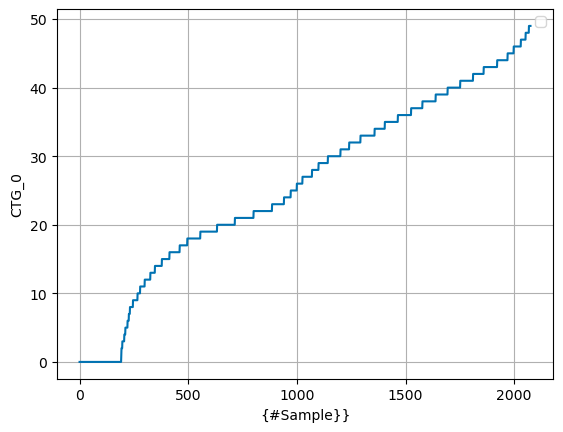

In [140]:
ctgs_range = range(0, 41, 1)
test_dataset_size = np.zeros(shape=(len(ctgs_range),), dtype=int)
J_scp_percgain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain2_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S4_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S4_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_scp_percloss_DT_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_S4_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
iter_scp_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_S4_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_gain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_gain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 

runtime_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S4_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S4_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S4_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S4_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S4_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S4_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_gain_mean_ctgsS4 = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsS4 = np.zeros(shape=(len(ctgs_range),), dtype=float)
runtime_gain_mean_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 

J_relgain_scp_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_S4_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_percgain_scp_S4_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_percgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT

n_unfeas_scp_cvx = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_S4 = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_DT = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT

ctgxx = 1

print('Testset analysis as function of CTGS0.')

fig, ax1 = plt.subplots()
ax1.plot(sorted(ctgs0_cvx_feas))
plt.legend(loc='best')
ax1.set_xlabel('{#Sample}}')
ax1.set_ylabel('CTG_0', color='k')
plt.grid(True)

iter = 0
for ctg in ctgs_range:

    ctg_mask = ctgs0_cvx_feas > ctg  # shape (n_feasible,), bool array

    ctgs0_cvx_feas_ctg = ctgs0_cvx_feas[ctg_mask]
    J_vect_scp_cvx_feas_ctg = J_vect_scp_cvx_feas[ctg_mask]
    J_vect_scp_S4_feas_ctg = J_vect_scp_S4_feas[ctg_mask]
    J_vect_scp_DT_feas_ctg = J_vect_scp_DT_feas[ctg_mask]

    J_cvx_feas_ctg = J_cvx_feas[ctg_mask]
    J_S4_feas_ctg = J_S4_feas[ctg_mask]
    J_DT_feas_ctg = J_DT_feas[ctg_mask]

    iter_scp_cvx_feas_ctg = iter_scp_cvx_feas[ctg_mask]
    iter_scp_S4_feas_ctg = iter_scp_S4_feas[ctg_mask]
    iter_scp_DT_feas_ctg = iter_scp_DT_feas[ctg_mask]

    runtime_cvx_feas_ctg = runtime_cvx_feas[ctg_mask]
    runtime_scp_cvx_feas_ctg = runtime_scp_cvx_feas[ctg_mask]

    runtime_S4_feas_ctg = runtime_S4_feas[ctg_mask]
    runtime_scp_S4_feas_ctg = runtime_scp_S4_feas[ctg_mask]

    runtime_DT_feas_ctg = runtime_DT_feas[ctg_mask]
    runtime_scp_DT_feas_ctg = runtime_scp_DT_feas[ctg_mask]

    if ctg == ctgxx:
        J_vect_scp_cvx_feas_ctgxx = J_vect_scp_cvx_feas_ctg
        J_vect_scp_S4_feas_ctgxx = J_vect_scp_S4_feas_ctg
        J_vect_scp_DT_feas_ctgxx = J_vect_scp_DT_feas_ctg    # Added line for DT
        J_cvx_feas_ctgxx = J_cvx_feas_ctg
        J_S4_feas_ctgxx = J_S4_feas_ctg
        J_DT_feas_ctgxx = J_DT_feas_ctg  # Added line for DT
        iter_scp_cvx_feas_ctgxx = iter_scp_cvx_feas_ctg
        iter_scp_S4_feas_ctgxx = iter_scp_S4_feas_ctg
        iter_scp_DT_feas_ctgxx = iter_scp_DT_feas_ctg  # Added line for DT

    test_dataset_size[iter] = len(ctgs0_cvx_feas_ctg)
    print('CTGS0 > ', ctg, ' . Test dataset size: ', test_dataset_size[iter])
    J_min_scp_cvx_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_cvx_feas_ctg])
    J_avg_scp_cvx_feas_ctg = J_min_scp_cvx_feas_ctg.mean()*1000.
    J_min_scp_S4_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_S4_feas_ctg]) 
    J_avg_scp_S4_feas_ctg = J_min_scp_S4_feas_ctg.mean()*1000.
    J_min_scp_DT_feas_ctg = np.array([np.min(j_vect) for j_vect in J_vect_scp_DT_feas_ctg]) 
    J_avg_scp_DT_feas_ctg = J_min_scp_DT_feas_ctg.mean()*1000.    # Added line for DT
    J_avg_cvx_feas_ctg = J_cvx_feas_ctg.mean()*1000.

    J_scp_percgain_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S4_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    J_scp_percgain_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_min_scp_S4_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    print('J_scp_gain_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter], 'J_scp_gain_std_ctgs_' + str(ctg) + ': ', J_scp_percgain_std_ctgs[iter])

    J_scp_percgain2_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S4_feas_ctg))/np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg))*100
    print('J_scp_gain2_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter])

    J_scp_percloss_cvx_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_cvx_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S4_mean_ctgs[iter] = np.mean((J_min_scp_S4_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S4_std_ctgs[iter] = np.std((J_min_scp_S4_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_DT_mean_ctgs[iter] = np.mean((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    J_scp_percloss_DT_std_ctgs[iter] = np.std((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    print('J_scp_percloss_cvx_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_mean_ctgs[iter], 'J_scp_percloss_cvx_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_std_ctgs[iter])
    print('J_scp_percloss_S4_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_S4_mean_ctgs[iter], 'J_scp_percloss_S4_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_S4_std_ctgs[iter])
    print('J_scp_percloss_DT_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_mean_ctgs[iter], 'J_scp_percloss_DT_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_std_ctgs[iter])

    iter_scp_mean_cvx_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg)
    iter_scp_mean_S4_ctgs[iter] = np.mean(iter_scp_S4_feas_ctg)
    iter_scp_mean_DT_ctgs[iter] = np.mean(iter_scp_DT_feas_ctg)  # Added line for DT
    iter_scp_std_cvx_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg)
    iter_scp_std_S4_ctgs[iter] = np.std(iter_scp_S4_feas_ctg)
    iter_scp_std_DT_ctgs[iter] = np.std(iter_scp_DT_feas_ctg)    # Added line for DT
    iter_scp_gain_mean_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg - iter_scp_S4_feas_ctg)
    iter_scp_gain_std_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg - iter_scp_S4_feas_ctg)
    print('iter_gain_mean_' + str(ctg) + ': ', iter_scp_gain_mean_ctgs[iter], ' iter_gain_std_' + str(ctg) + ': ', iter_scp_gain_std_ctgs[iter])
    print('iter_scp_mean_cvx_' + str(ctg) + ': ', iter_scp_mean_cvx_ctgs[iter], ' iter_scp_std_cvx_' + str(ctg) + ': ', iter_scp_std_cvx_ctgs[iter])
    print('iter_scp_mean_S4_' + str(ctg) + ': ', iter_scp_mean_S4_ctgs[iter], ' iter_scp_std_S4_' + str(ctg) + ': ', iter_scp_std_S4_ctgs[iter])
    print('iter_scp_mean_DT_' + str(ctg) + ': ', iter_scp_mean_DT_ctgs[iter], ' iter_scp_std_DT_' + str(ctg) + ': ', iter_scp_std_DT_ctgs[iter])

    runtime_mean_cvx_ctgs[iter] = np.mean(runtime_cvx_feas_ctg)
    runtime_mean_S4_ctgs[iter] = np.mean(runtime_S4_feas_ctg)
    runtime_mean_DT_ctgs[iter] = np.mean(runtime_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_ctgs[iter] = np.std(runtime_cvx_feas_ctg)
    runtime_std_S4_ctgs[iter] = np.std(runtime_S4_feas_ctg)
    runtime_std_DT_ctgs[iter] = np.std(runtime_DT_feas_ctg)    # Added line for DT
    runtime_mean_cvx_scp_ctgs[iter] = np.mean(runtime_scp_cvx_feas_ctg)
    runtime_mean_S4_scp_ctgs[iter] = np.mean(runtime_scp_S4_feas_ctg)
    runtime_mean_DT_scp_ctgs[iter] = np.mean(runtime_scp_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_scp_ctgs[iter] = np.std(runtime_scp_cvx_feas_ctg)
    runtime_std_S4_scp_ctgs[iter] = np.std(runtime_scp_S4_feas_ctg)
    runtime_std_DT_scp_ctgs[iter] = np.std(runtime_scp_DT_feas_ctg)    # Added line for DT

    runtime_mean_cvx_tot_ctgs[iter] = np.mean(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_mean_S4_tot_ctgs[iter] = np.mean(runtime_S4_feas_ctg + runtime_scp_S4_feas_ctg)
    runtime_mean_DT_tot_ctgs[iter] = np.mean(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_std_cvx_tot_ctgs[iter] = np.std(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_std_S4_tot_ctgs[iter] = np.std(runtime_S4_feas_ctg + runtime_scp_S4_feas_ctg)
    runtime_std_DT_tot_ctgs[iter] = np.std(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_gain_mean_ctgsS4[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S4_feas_ctg + runtime_scp_S4_feas_ctg))
    runtime_gain_std_ctgsS4[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S4_feas_ctg + runtime_scp_S4_feas_ctg))
    runtime_gain_mean_ctgsDT[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))
    runtime_gain_std_ctgsDT[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))

    # print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    # print('S4runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS4[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS4[iter])

    print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], ' DTruntime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    print('S4runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS4[iter], ' S4runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS4[iter])
    print('runtime_scp_mean_cvx_' + str(ctg) + ': ', runtime_mean_cvx_tot_ctgs[iter], ' runtime_scp_std_cvx_' + str(ctg) + ': ', runtime_std_cvx_tot_ctgs[iter])
    print('runtime_scp_mean_DT_' + str(ctg) + ': ', runtime_mean_DT_tot_ctgs[iter], ' runtime_scp_std_DT_' + str(ctg) + ': ', runtime_std_DT_tot_ctgs[iter])
    print('runtime_scp_mean_S4_' + str(ctg) + ': ', runtime_mean_S4_tot_ctgs[iter], ' runtime_scp_std_S4_' + str(ctg) + ': ', runtime_std_S4_tot_ctgs[iter])


    J_relgain_scp_cvx_mean_ctgs[iter] = J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg
    
    J_relgain_scp_DT_mean_ctgs[iter] = J_avg_scp_DT_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_DT_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_DT_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)

    J_relgain_scp_S4_mean_ctgs[iter] = J_avg_scp_S4_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_S4_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_S4_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)
    
    
    # total = np.sum(ctg_mask)
    # if total > 0:
    #     n_unfeas_scp_cvx[iter] = 100 * np.sum(~feasibility_list_CVX[ctg_mask]) / total
    #     n_unfeas_scp_DT[iter] = 100 * np.sum(~feasibility_list_DT[ctg_mask]) / total
    #     n_unfeas_scp_S4[iter] = 100 * np.sum(~feasibility_list_S4[ctg_mask]) / total
    # else:
    #     # Avoid division by zero if no samples >= ctg
    #     n_unfeas_scp_cvx[iter] = np.nan
    #     n_unfeas_scp_DT[iter] = np.nan
    #     n_unfeas_scp_S4[iter] = np.nan

    # # i_ctg2 = list(set(np.rint(test_dataset_ix[ctgs0_cvx>=ctg]).astype(int)))

    # # i_unfeas_scp_cvx_ctg = list(set(i_unfeas_scp_cvx).intersection(set(i_ctg2)))
    # # i_unfeas_scp_DT_ctg = list(set(i_unfeas_DT).intersection(set(i_ctg2)))
    # # i_unfeas_scp_S4_ctg = list(set(i_unfeas_S4).intersection(set(i_ctg2)))
    
    # # n_unfeas_scp_cvx[iter] = (len(i_unfeas_scp_cvx_ctg)/len(i_ctg2))*100
    # # n_unfeas_scp_DT[iter] = (len(i_unfeas_scp_DT_ctg)/len(i_ctg2))*100
    # # n_unfeas_scp_S4[iter] = (len(i_unfeas_scp_S4_ctg)/len(i_ctg2))*100

    iter += 1

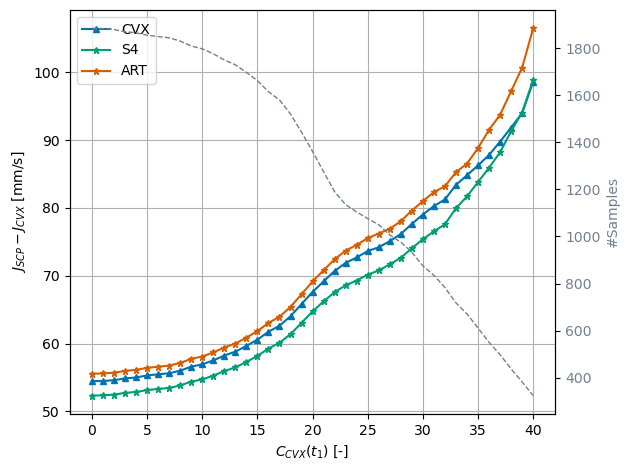

In [141]:
#%matplotlib ipympl
plt.style.use('seaborn-v0_8-colorblind')

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'$J_{SCP} - J_{CVX}$ [mm/s]', color='k')
ax1.plot(ctgs_range, J_relgain_scp_cvx_mean_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, J_relgain_scp_S4_mean_ctgs, marker='*', markersize=5,  label='S4')
    ax1.plot(ctgs_range, J_relgain_scp_DT_mean_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, J_relgain_scp_S4_mean_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
# plt.hlines(0, 0, 51, linestyle='--', color='k')
# plt.ylim([-0.01, 0.01])
plt.legend(loc='best')
plt.grid(True)
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_il.png', dpi=600)


In [142]:
print(100*J_percgain_scp_S4_mean_ctgs)
print(100*J_percgain_scp_DT_mean_ctgs)

[ 3.8957      3.89570449  3.89574053  3.89584153  3.89603394  3.89642507
  3.89687068  3.89719705  3.89938107  3.903698    3.90647934  3.91212897
  3.92212842  3.93127059  3.94852426  3.96975898  4.0095204   4.040599
  4.10968843  4.21232875  4.26393372  4.26484769  4.41665987  4.59361851
  4.67198381  4.73325738  4.60577802  4.53666331  4.61237247  4.61586773
  4.61527479  4.6427162   4.51057812  4.11643068  3.68612404  2.83494308
  2.13938408  1.75672475  0.5838996  -0.0795109  -0.3094799 ]
[-2.02324328 -2.02324562 -2.02347565 -2.02372927 -2.02385107 -2.02485734
 -2.02508892 -2.02566961 -2.02777192 -2.03046346 -2.03207776 -2.03502756
 -2.04026339 -2.04538313 -2.05563965 -2.06687008 -2.09218524 -2.10896386
 -2.14571942 -2.20353074 -2.27819918 -2.35994189 -2.44069932 -2.50845298
 -2.55397089 -2.58860495 -2.7312487  -2.42853732 -2.47323093 -2.53876618
 -2.49448649 -2.57735427 -2.37481927 -2.24796827 -2.0155122  -2.94114598
 -4.22264647 -4.40956047 -5.82538102 -7.11226696 -7.99574777]


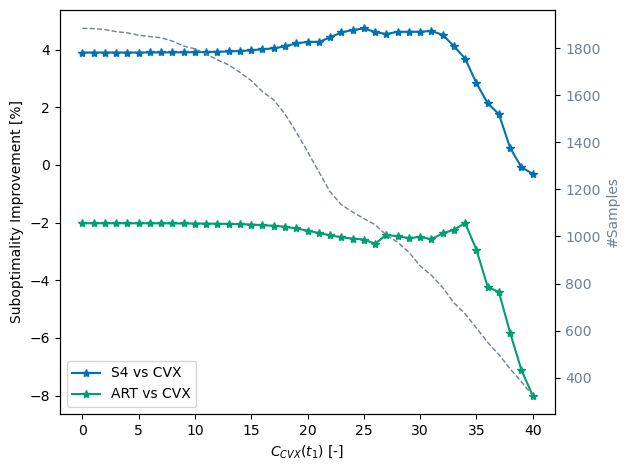

In [143]:

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Suboptimality Improvement [%]', color='k')
if rl:
    ax1.plot(ctgs_range, J_percgain_scp_S4_mean_ctgs*100., marker='*', label='S4 vs CVX')
    ax1.plot(ctgs_range, J_percgain_scp_DT_mean_ctgs*100., marker='*', label='ART vs CVX')
else:
    ax1.plot(ctgs_range, J_percgain_scp_S4_mean_ctgs*100., marker='*', label='ART-IL vs CVX')
ax1.tick_params(axis='y', labelcolor=color)
if rl:
    plt.legend(loc='lower left')
else:
    plt.legend(loc='lower left')
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_il.png', dpi=600)




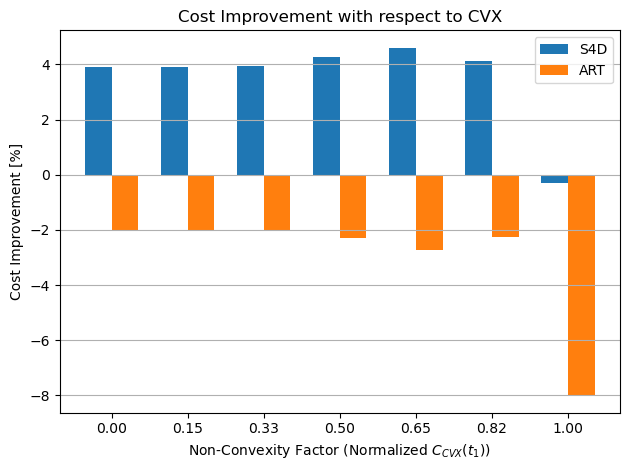

In [144]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean cost values at selected CTG points ===
J_S4_sample = J_percgain_scp_S4_mean_ctgs[ctg_sample_points]
J_DT_sample = J_percgain_scp_DT_mean_ctgs[ctg_sample_points]
# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s4 = 100 * J_S4_sample
gain_dt = 100 * J_DT_sample

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, gain_s4, width=bar_width, label='S4D', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Cost Improvement [%]')
ax.set_title('Cost Improvement with respect to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


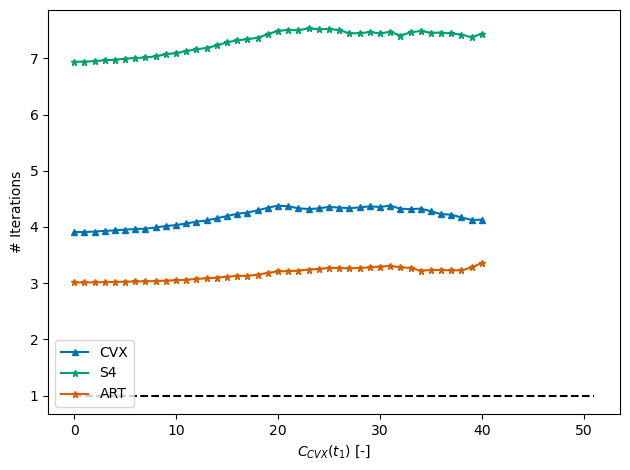

In [145]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'# Iterations', color='k')
ax1.plot(ctgs_range, iter_scp_mean_cvx_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, iter_scp_mean_S4_ctgs, marker='*', markersize=5,  label='S4')
    ax1.plot(ctgs_range, iter_scp_mean_DT_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, iter_scp_mean_S4_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(1, 0, 51, linestyle='--', color='k')
plt.legend(loc='lower left')
# ax2 = ax1.twinx() 
# color = 'slategray'
# ax2.set_ylabel('#Samples', color=color)
# ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
# ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_il.png', dpi=600)



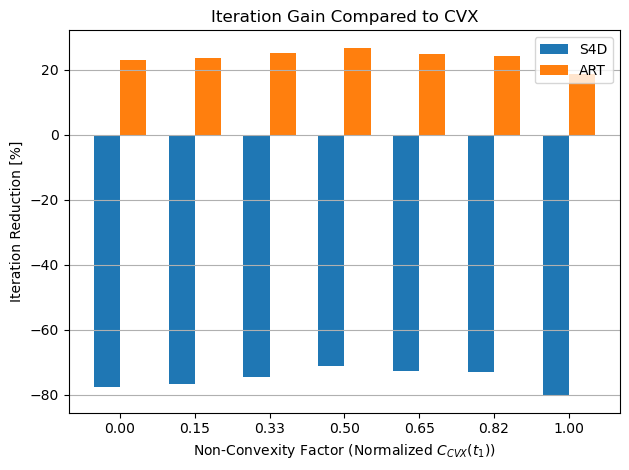

In [146]:
ctg_sample_points = np.linspace(0, 40, 7, endpoint=True).astype(int)  # e.g., [0, 5, 11, ..., 35]
non_convexity_factors = ctg_sample_points / 40.0

# === Step 2: Get mean iteration values at selected CTG points ===
cvx_iter_sample = iter_scp_mean_cvx_ctgs[ctg_sample_points]
s4_iter_sample = iter_scp_mean_S4_ctgs[ctg_sample_points]
dt_iter_sample = iter_scp_mean_DT_ctgs[ctg_sample_points]

# === Step 3: Compute percentage gain (iteration reduction vs CVX) ===
gain_s4 = 100 * (cvx_iter_sample - s4_iter_sample) / cvx_iter_sample
gain_dt = 100 * (cvx_iter_sample - dt_iter_sample) / cvx_iter_sample

# === Step 4: Plot the bar chart ===
bar_width = 0.35
x = np.arange(len(non_convexity_factors))

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, gain_s4, width=bar_width, label='S4D', color='tab:blue')
bar2 = ax.bar(x + bar_width/2, gain_dt, width=bar_width, label='ART', color='tab:orange')

# Labeling
ax.set_xlabel('Non-Convexity Factor (Normalized $C_{CVX}(t_1)$)')
ax.set_ylabel('Iteration Reduction [%]')
ax.set_title('Iteration Gain Compared to CVX')
ax.set_xticks(x)
ax.set_xticklabels([f"{val:.2f}" for val in non_convexity_factors])
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


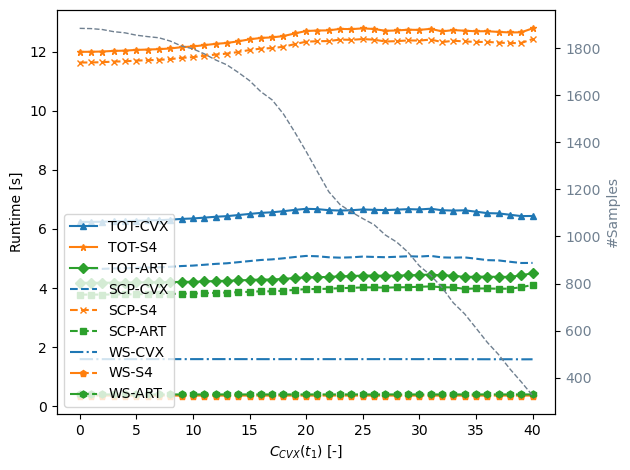

In [147]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Runtime [s]', color='k')

# Assign different markers and colors
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs, marker='^', markersize=5, color='#1f77b4', label='TOT-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S4_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-S4')
    ax1.plot(ctgs_range, runtime_mean_DT_tot_ctgs, marker='D', markersize=5, color='#2ca02c', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S4_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_scp_ctgs, linestyle='--', color='#1f77b4', label='SCP-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S4_scp_ctgs, linestyle='--',color='#ff7f0e', marker='x', markersize=5, label='SCP-S4')
    ax1.plot(ctgs_range, runtime_mean_DT_scp_ctgs, linestyle='--', color='#2ca02c', marker='s', markersize=5, label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S4_scp_ctgs, linestyle='--', color='#D55E00', marker='x', markersize=5, label='SCP-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_ctgs, linestyle='-.', color='#1f77b4', label='WS-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S4_ctgs, linestyle='-.', color='#ff7f0e', marker='p', markersize=5, label='WS-S4')
    ax1.plot(ctgs_range, runtime_mean_DT_ctgs, linestyle='-.', color='#2ca02c', marker='h', markersize=5, label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S4_ctgs, linestyle='-.', color='orangered', marker='p', markersize=5, label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor='k')
plt.legend(loc='lower left')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_il.png', dpi=600)


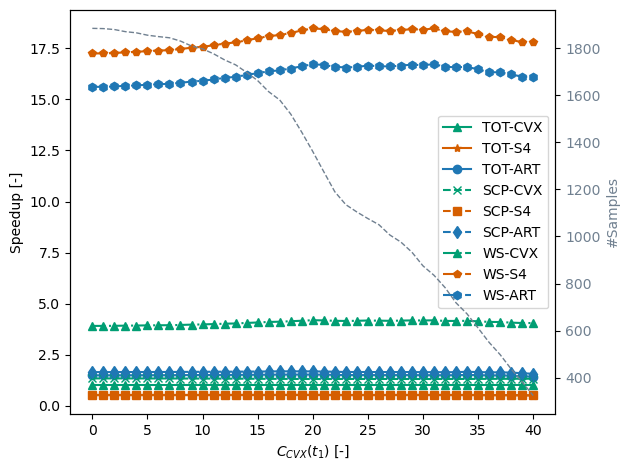

In [148]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Speedup [-]', color='k')

# CVX Type - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_tot_ctgs, linestyle='-', marker='^', color='#009E73', label='TOT-CVX')

# S4 Type - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-S4')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_tot_ctgs, linestyle='-', marker='o', color='#1f77b4', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-ART-IL')

# SCP-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_scp_ctgs, linestyle='--', color='#009E73', marker='x', label='SCP-CVX')

# SCP-S4 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_scp_ctgs, linestyle='--', color='#D55E00', marker='s', label='SCP-S4')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_scp_ctgs, linestyle='--', color='#1f77b4', marker='d', label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_scp_ctgs, linestyle='--', color='#D55E00', marker='*', label='SCP-ART-IL')

# WS-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_ctgs, linestyle='-.', color='#009E73', marker='^', label='WS-CVX')

# WS-S4 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_ctgs, linestyle='-.', color='#D55E00', marker='p', label='WS-S4')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_ctgs, linestyle='-.', color='#1f77b4', marker='h', label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4_ctgs, linestyle='-.', color='orangered', marker='s', label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc='best')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_il.png', dpi=600)
